# Preparing Working environnment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import timeit

In [2]:
# Allowing modules autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Pandas options
pd.options.display.max_columns = 100

In [3]:
# Importing data
data = pd.read_pickle('Seattle-cleaned.pkl')

# Preparing ML training

## Definition of features and labels

In [4]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       'Outlier', 'Longitude', 'Latitude', 'Address', 'ZipCode'],
      dtype='object')

In [5]:
# Labels
y_ = data[['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']]
y_.index = range(y_.shape[0])

GHGEmissions : total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent.

SiteEnergyUse : The annual amount of energy consumed by the property from all sources of energy.

Source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [6]:
# Features
X_ = data[[
    'BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
    'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
    'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
    'ENERGYSTARScore', 'DefaultData', 'ComplianceStatus', 'Outlier', 
    'Longitude', 'Latitude', 'ZipCode'
    
]]
X_.index = range(X_.shape[0])

In [7]:
X_.shape, y_.shape

((3284, 23), (3284, 2))

## Encoding Categorical data

In [8]:
# Spliting categorical and numerical data
list_categ = [c for c in X_.columns if data[c].dtype == object]
list_numer = [c for c in X_.columns if c not in list_categ]
list_categ, list_numer

(['BuildingType',
  'PrimaryPropertyType',
  'Neighborhood',
  'LargestPropertyUseType',
  'SecondLargestPropertyUseType',
  'ThirdLargestPropertyUseType',
  'ComplianceStatus',
  'Outlier'],
 ['CouncilDistrictCode',
  'YearBuilt',
  'NumberofBuildings',
  'NumberofFloors',
  'PropertyGFATotal',
  'PropertyGFAParking',
  'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA',
  'SecondLargestPropertyUseTypeGFA',
  'ThirdLargestPropertyUseTypeGFA',
  'ENERGYSTARScore',
  'DefaultData',
  'Longitude',
  'Latitude',
  'ZipCode'])

### Encoding Neighborhood

In [9]:
# Creating dataframe with encoded columns, adding numerical data
X_enc = X_[list_numer].iloc[:,:-1].join(
    pd.get_dummies(X_[['Neighborhood']])
)

X_enc.sample(5)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,DefaultData,Longitude,Latitude,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
1170,2,1944,1,1,25880,0,25880,25880.0,NaN,NaN,99.0,False,-122.324322,47.587740,0,0,0,0,0,1,0,0,0,0,0,0,0
84,2,1957,1,1,130862,0,130862,132060.0,NaN,NaN,65.0,True,-122.311211,47.563013,0,0,0,0,0,1,0,0,0,0,0,0,0
2734,2,1959,1,1,67450,0,67450,42760.0,NaN,NaN,97.0,False,-122.269220,47.522620,0,0,0,0,0,0,0,0,0,0,0,1,0
1427,4,1910,1,2,33300,0,33300,30740.0,NaN,NaN,94.0,False,-122.335745,47.661790,0,0,0,0,0,0,1,0,0,0,0,0,0
1841,7,1900,1,7,89550,0,89550,64712.0,10058.0,7030.0,85.0,False,-122.333320,47.602660,0,0,0,1,0,0,0,0,0,0,0,0,0


### Encoding ZipCode

In [10]:
len(X_['ZipCode'].unique())

49

In [11]:
X_enc = X_enc.join(
    pd.get_dummies(X_[['ZipCode']].astype('Int64').astype('str')).iloc[:,:-1]
)

### Encoding Compliance Status and Outlier

In [12]:
X_['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [13]:
# Encoding Compliance Status
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

lab_enc.fit(
    ['Compliant', 'Error - Correct Default Data', 'Missing Data','Non-Compliant']
)

X_enc['ComplianceStatus'] = lab_enc.transform(X_['ComplianceStatus'])

In [14]:
X_['Outlier'].unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

In [15]:
# Encoding Outlier
lab_enc.fit(['High Outlier', 'Not an outlier', 'Low Outlier'])
X_enc['Outlier'] = lab_enc.transform(X_['Outlier'].fillna('Not an outlier'))

### Encoding property types

Goal here is to transform columns large, second and third property type use and their respective GFAs into a matrix giving GFA for each possible type.

In [16]:
# Listing property types
l_prop_types = data['LargestPropertyUseType'].append(
    data['SecondLargestPropertyUseType']).append(
    data['ThirdLargestPropertyUseType']
).sort_values().fillna('unknown').unique()

l_prop_types

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'Bar/Nightclub', 'College/University',
       'Convenience Store without Gas Station', 'Convention Center',
       'Courthouse', 'Data Center', 'Distribution Center',
       'Enclosed Mall', 'Fast Food Restaurant', 'Financial Office',
       'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Sales',
       'Food Service', 'Hospital (General Medical & Surgical)', 'Hotel',
       'K-12 School', 'Laboratory', 'Library', 'Lifestyle Center',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Movie Theater', 'Multifamily Housing', 'Museum',
       'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Education', 'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services',
       'Other - Technology/Science', 'Other - Utility',
       'Other/Special

In [17]:
len(l_prop_types)

66

In [18]:
# Adding a column per property type
# and calculating allocated GFA per use type
X_fill = X_.fillna(0)
for prop_type in l_prop_types:
    X_enc[prop_type + 'GFA'] = (
        X_fill['LargestPropertyUseTypeGFA'] * (X_fill['LargestPropertyUseType'] == prop_type)) + (
        X_fill['SecondLargestPropertyUseTypeGFA'] * (X_fill['SecondLargestPropertyUseType'] == prop_type)) + (
        X_fill['ThirdLargestPropertyUseTypeGFA'] * (X_fill['ThirdLargestPropertyUseType'] == prop_type))

### Checking good conversion

In [19]:
X_enc.sample(5)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,DefaultData,Longitude,Latitude,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ZipCode_98006,ZipCode_98011,ZipCode_98013,ZipCode_98020,ZipCode_98033,ZipCode_98053,ZipCode_98070,ZipCode_98101,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98111,ZipCode_98112,ZipCode_98113,ZipCode_98114,ZipCode_98115,ZipCode_98116,ZipCode_98117,...,Food ServiceGFA,Hospital (General Medical & Surgical)GFA,HotelGFA,K-12 SchoolGFA,LaboratoryGFA,LibraryGFA,Lifestyle CenterGFA,Manufacturing/Industrial PlantGFA,Medical OfficeGFA,Movie TheaterGFA,Multifamily HousingGFA,MuseumGFA,Non-Refrigerated WarehouseGFA,OfficeGFA,OtherGFA,Other - EducationGFA,Other - Entertainment/Public AssemblyGFA,Other - Lodging/ResidentialGFA,Other - MallGFA,Other - Public ServicesGFA,Other - RecreationGFA,Other - Restaurant/BarGFA,Other - ServicesGFA,Other - Technology/ScienceGFA,Other - UtilityGFA,Other/Specialty HospitalGFA,Outpatient Rehabilitation/Physical TherapyGFA,ParkingGFA,Performing ArtsGFA,"Personal Services (Health/Beauty, Dry Cleaning, etc)GFA",Police StationGFA,Pre-school/DaycareGFA,Prison/IncarcerationGFA,Refrigerated WarehouseGFA,"Repair Services (Vehicle, Shoe, Locksmith, etc)GFA",Residence Hall/DormitoryGFA,Residential Care FacilityGFA,RestaurantGFA,Retail StoreGFA,Self-Storage FacilityGFA,Senior Care CommunityGFA,Social/Meeting HallGFA,Strip MallGFA,Supermarket/Grocery StoreGFA,Swimming PoolGFA,Urgent Care/Clinic/Other OutpatientGFA,Vocational SchoolGFA,Wholesale Club/SupercenterGFA,Worship FacilityGFA,unknownGFA
547,7,1981,1,19,383515,89778,293737,312442.0,84800.0,18799.0,91.0,False,-122.334385,47.614149,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18799.0,0.0,0.0,0.0,0.0,312442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,3,1998,1,5,123920,30000,93920,123920.0,30000.0,0.0,82.0,False,-122.329060,47.629704,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,123920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2123,2,1994,3,1,102133,0,102133,107427.0,0.0,NaN,NaN,False,-122.288810,47.569610,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2551,7,2008,1,4,274442,0,274442,108763.0,105499.0,58152.0,NaN,False,-122.344730,47.618930,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,108763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105499.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2104,4,2001,1,6,91706,36583,55123,53281.0,34701.0,3724.0,2.0,False,-122.316250,47.661580,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53281.0,3724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34701.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_[['LargestPropertyUseType','LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseType','SecondLargestPropertyUseType']][:5]

,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseType
0,Hotel,88434.0,NaN,NaN
1,Hotel,83880.0,Parking,Parking
2,Hotel,757243.0,Parking,Parking
3,Hotel,61320.0,NaN,NaN
4,Hotel,123445.0,Parking,Parking


In [21]:
X_enc[['HotelGFA']][:5]

,HotelGFA
0,88434.0
1,83880.0
2,757243.0
3,61320.0
4,123445.0


In [22]:
X_enc.drop(columns = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA', 
                       'ThirdLargestPropertyUseTypeGFA'],
          inplace = True)

In [23]:
len(X_enc.columns)

140

## Dealing with NaN values

In [24]:
# Columns with missing values
s = X_enc.count() /  X_enc.shape[0]
s[s != 1]

NumberofBuildings    0.999391
NumberofFloors       0.997564
ENERGYSTARScore      0.671133
dtype: float64

In [25]:
X_enc.drop(columns = 'ENERGYSTARScore', inplace = True)

### In number of buildings

In [26]:
X_enc[X_enc['NumberofBuildings'].isna()]

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),DefaultData,Longitude,Latitude,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ZipCode_98006,ZipCode_98011,ZipCode_98013,ZipCode_98020,ZipCode_98033,ZipCode_98053,ZipCode_98070,ZipCode_98101,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98111,ZipCode_98112,ZipCode_98113,ZipCode_98114,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,...,Food ServiceGFA,Hospital (General Medical & Surgical)GFA,HotelGFA,K-12 SchoolGFA,LaboratoryGFA,LibraryGFA,Lifestyle CenterGFA,Manufacturing/Industrial PlantGFA,Medical OfficeGFA,Movie TheaterGFA,Multifamily HousingGFA,MuseumGFA,Non-Refrigerated WarehouseGFA,OfficeGFA,OtherGFA,Other - EducationGFA,Other - Entertainment/Public AssemblyGFA,Other - Lodging/ResidentialGFA,Other - MallGFA,Other - Public ServicesGFA,Other - RecreationGFA,Other - Restaurant/BarGFA,Other - ServicesGFA,Other - Technology/ScienceGFA,Other - UtilityGFA,Other/Specialty HospitalGFA,Outpatient Rehabilitation/Physical TherapyGFA,ParkingGFA,Performing ArtsGFA,"Personal Services (Health/Beauty, Dry Cleaning, etc)GFA",Police StationGFA,Pre-school/DaycareGFA,Prison/IncarcerationGFA,Refrigerated WarehouseGFA,"Repair Services (Vehicle, Shoe, Locksmith, etc)GFA",Residence Hall/DormitoryGFA,Residential Care FacilityGFA,RestaurantGFA,Retail StoreGFA,Self-Storage FacilityGFA,Senior Care CommunityGFA,Social/Meeting HallGFA,Strip MallGFA,Supermarket/Grocery StoreGFA,Swimming PoolGFA,Urgent Care/Clinic/Other OutpatientGFA,Vocational SchoolGFA,Wholesale Club/SupercenterGFA,Worship FacilityGFA,unknownGFA
2194,7,1924,<NA>,4,63150,0,63150,False,-122.33293,47.60380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3046,4,1928,<NA>,2,20760,0,20760,False,-122.31345,47.66182,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data.iloc[[2194, 3046]]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,ZipCode
3912,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,1924,<NA>,4,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,-122.33293,47.60380,215 COLUMBIA ST,98104.0
6009,NonResidential,Mixed Use Property,4,NORTHEAST,1928,<NA>,2,20760,0,20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,-122.31345,47.66182,4515 UNIVERSITY WAY NE,98105.0


In [28]:
X_enc.drop(index = [2194,3046], inplace = True)

### In number of floors

In [29]:
X_enc[X_enc['NumberofFloors'].isna()]

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),DefaultData,Longitude,Latitude,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ZipCode_98006,ZipCode_98011,ZipCode_98013,ZipCode_98020,ZipCode_98033,ZipCode_98053,ZipCode_98070,ZipCode_98101,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98111,ZipCode_98112,ZipCode_98113,ZipCode_98114,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,...,Food ServiceGFA,Hospital (General Medical & Surgical)GFA,HotelGFA,K-12 SchoolGFA,LaboratoryGFA,LibraryGFA,Lifestyle CenterGFA,Manufacturing/Industrial PlantGFA,Medical OfficeGFA,Movie TheaterGFA,Multifamily HousingGFA,MuseumGFA,Non-Refrigerated WarehouseGFA,OfficeGFA,OtherGFA,Other - EducationGFA,Other - Entertainment/Public AssemblyGFA,Other - Lodging/ResidentialGFA,Other - MallGFA,Other - Public ServicesGFA,Other - RecreationGFA,Other - Restaurant/BarGFA,Other - ServicesGFA,Other - Technology/ScienceGFA,Other - UtilityGFA,Other/Specialty HospitalGFA,Outpatient Rehabilitation/Physical TherapyGFA,ParkingGFA,Performing ArtsGFA,"Personal Services (Health/Beauty, Dry Cleaning, etc)GFA",Police StationGFA,Pre-school/DaycareGFA,Prison/IncarcerationGFA,Refrigerated WarehouseGFA,"Repair Services (Vehicle, Shoe, Locksmith, etc)GFA",Residence Hall/DormitoryGFA,Residential Care FacilityGFA,RestaurantGFA,Retail StoreGFA,Self-Storage FacilityGFA,Senior Care CommunityGFA,Social/Meeting HallGFA,Strip MallGFA,Supermarket/Grocery StoreGFA,Swimming PoolGFA,Urgent Care/Clinic/Other OutpatientGFA,Vocational SchoolGFA,Wholesale Club/SupercenterGFA,Worship FacilityGFA,unknownGFA
1169,2,1991,10,<NA>,180796,0,180796,False,-122.323398,47.591130,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1576,4,1940,1,<NA>,384772,0,384772,True,-122.262390,47.682195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349953.0,63872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1577,4,1960,1,<NA>,30287,0,30287,True,-122.262946,47.682195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31843.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1578,4,1960,1,<NA>,21931,0,21931,True,-122.333786,47.601536,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1584,2,1906,1,<NA>,39212,0,39212,False,-122.316452,47.607845,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1593,4,1929,7,<NA>,502030,0,502030,False,-122.324799,47.615452,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5642

In [30]:
X_enc.drop(index = X_enc[X_enc['NumberofFloors'].isna()].index,
           inplace = True)

### Missing and null values in labels

In [31]:
removed_xindex = [index for index in y_.index if index not in X_enc.index]

In [32]:
len(removed_xindex)

10

In [33]:
y_enc = y_.drop(index = removed_xindex)

In [34]:
y_enc[
    (y_enc['GHGEmissions(MetricTonsCO2e)'].isna()) |
    (y_enc['SiteEnergyUse(kBtu)'].isna())
]

,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu)
60,NaN,NaN
658,NaN,NaN
935,NaN,NaN
936,NaN,NaN
1220,NaN,NaN
1335,NaN,NaN


In [35]:
y_enc.sort_values(by = 'SiteEnergyUse(kBtu)').head(20)

,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu)
558,0.00,0.00000
1717,16.36,0.00000
1727,14.67,0.00000
43,0.00,0.00000
1713,11.84,0.00000
3205,265.21,0.00000
2567,0.00,0.00000
1763,229.38,0.00000
1769,170.90,0.00000
1663,10.43,0.00000


In [36]:
y_enc.sort_values(by = 'GHGEmissions(MetricTonsCO2e)').head(10)

,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu)
3221,-0.80,3.427261e+05
2567,0.00,0.000000e+00
1660,0.00,0.000000e+00
558,0.00,0.000000e+00
43,0.00,0.000000e+00
2131,0.00,1.252517e+07
2296,0.00,0.000000e+00
1782,0.00,0.000000e+00
1929,0.00,0.000000e+00
1118,0.08,1.144100e+04


In [37]:
y_enc.mask(
    (y_enc['GHGEmissions(MetricTonsCO2e)'] <= 0) | (y_enc['SiteEnergyUse(kBtu)'] <= 0),
    inplace = True
)

In [38]:
len(y_enc.dropna())/len(y_enc)

0.9920586438607208

In [39]:
y_enc.dropna(inplace = True)

In [40]:
removed_yindex = [index for index in X_enc.index if index not in y_enc.index]
X_enc = X_enc.drop(index = removed_yindex)

## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_enc)
X_std = x_scaler.transform(X_enc)

y_std = y_enc

## Test set and training set


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.2, random_state = 1043)

In [43]:
X_train.shape, X_test.shape

((2598, 139), (650, 139))

# Training a dummy regressor for baseline

## Mean strategy

In [44]:
# Dummy regressor always giving mean of observations
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

dummy = DummyRegressor(strategy = 'mean')

start_time = timeit.default_timer()
dummy.fit(X_train, y_train)
end_time = timeit.default_timer()
print(end_time - start_time)

y_dummy = dummy.predict(X_test)

0.003122199999950226


In [45]:
# Errors on GHG Emissions and Energy use
from PElec_01_scripts import score_predictions
score_predictions(y_test, pd.DataFrame(y_dummy))

,GHG emissions,Energy use
MSLE,3.3778,2.7667
R²,-0.0022,-0.0003


## Random strategy

In [46]:
# Dummy regressor always giving random results
y_random = np.random.randint(np.min(y_train), np.max(y_train), y_test.shape)
score_predictions(y_test, pd.DataFrame(y_random))

,GHG emissions,Energy use
MSLE,24.8617,24.8570
R²,-199.4497,-484.1127


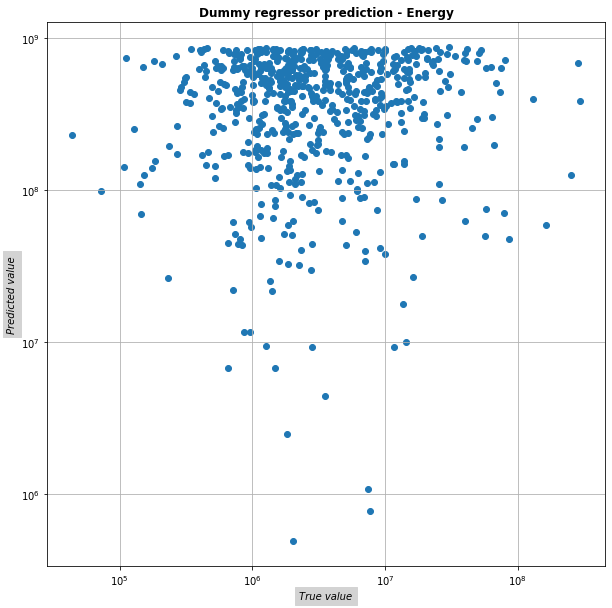

In [47]:
plt.figure(figsize = (10,10) )

plt.scatter(
    y_test.iloc[:,1],
    y_random[:,1]
)

plt.gca().set_xscale('symlog')
plt.gca().set_yscale('symlog')
plt.grid(True)

plt.xlabel('True value', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.ylabel('Predicted value', backgroundcolor = 'lightgrey', fontstyle = 'italic')
plt.title("Dummy regressor prediction - Energy", fontweight = 'bold')

plt.show()

In [48]:
# Storing y_test
df_results = y_test.rename(columns = {
    'GHGEmissions(MetricTonsCO2e)' : 'test_GHG' ,
    'SiteEnergyUse(kBtu)' : 'test_Energy'
})

In [49]:
# Storing dummy regressor predictions
from PElec_01_scripts import store_results
df_results = store_results(y_dummy, 'dummy', df_results)

# Random Forest

## Testing a random forest

### Training on target

In [50]:
# GHG Emissions
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

start_time = timeit.default_timer()
rfr.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_rf = end_time - start_time
print(time_rf)

y_forest_ghg = rfr.predict(X_test)

# Energy use
rfr.fit(X_train, y_train.iloc[:,1])
y_forest_eng = rfr.predict(X_test)

# Storage and score
y_forest = pd.DataFrame(np.array([y_forest_ghg, y_forest_eng]).T)
score_predictions(y_test, y_forest)

5.981015999999954


,GHG emissions,Energy use
MSLE,0.6496,0.3306
R²,0.9023,0.9126


In [51]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
df_results = store_results(y_forest, 'forest', df_results)

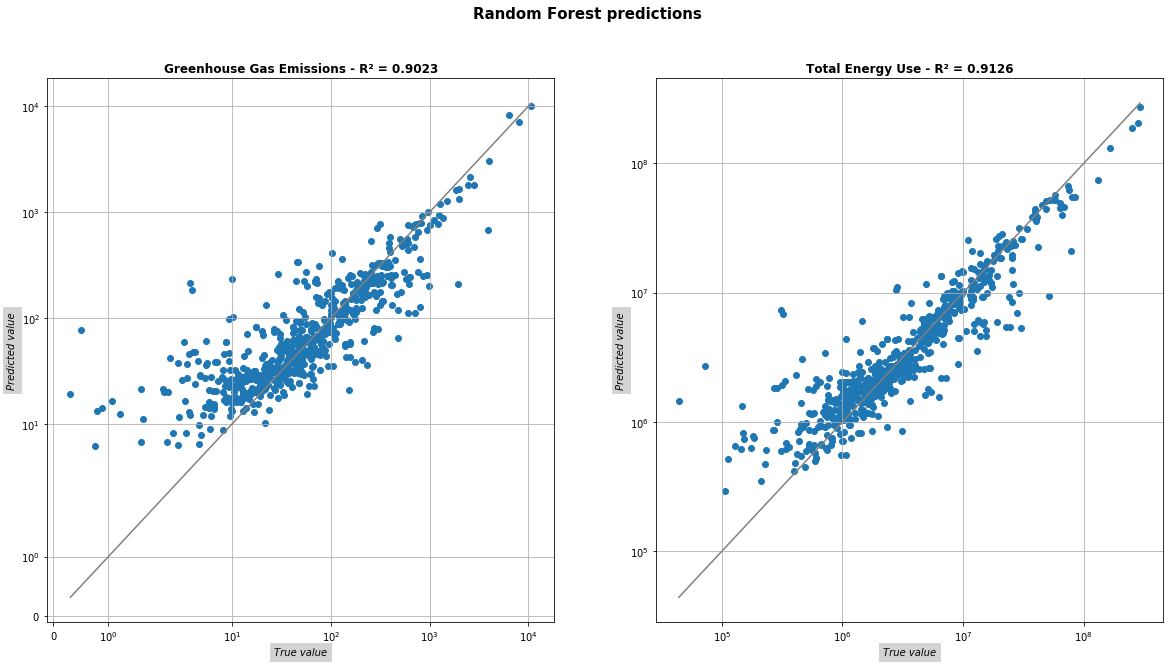

In [53]:
# Visualisation
from PElec_01_scripts import plot_results
plot_results(df_results, 'forest', 'Random Forest predictions', p_score = 'R²')

In [54]:
# Most important features
df_feature_imp = pd.DataFrame(rfr.feature_importances_, X_enc.columns, ['importance'])
df_feature_imp.sort_values(by = 'importance', ascending = False).head(10)

,importance
PropertyGFABuilding(s),0.190510
Hospital (General Medical & Surgical)GFA,0.173815
PropertyGFATotal,0.149527
NumberofBuildings,0.136039
College/UniversityGFA,0.091647
LaboratoryGFA,0.086262
Data CenterGFA,0.042991
ZipCode_98108,0.022313
OtherGFA,0.017118
Non-Refrigerated WarehouseGFA,0.014096


### Random forest with log-scaled y

In [55]:
# GHG Emissions
start_time = timeit.default_timer()
rfr.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_rf = end_time - start_time 
print(time_rf)

y_forest_log_ghg = np.expm1(rfr.predict(X_test))

# Energy use
start_time = timeit.default_timer()
rfr.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_rf = end_time - start_time 
print(time_rf)

y_forest_log_eng = np.expm1(rfr.predict(X_test))

# Storage and scores
y_forest_log = pd.DataFrame(np.array([y_forest_log_ghg, y_forest_log_eng]).T)
score_predictions(y_test, y_forest_log)

3.4490070000000514
3.4587169999999787


,GHG emissions,Energy use
MSLE,0.5841,0.3499
R²,0.7765,0.7316


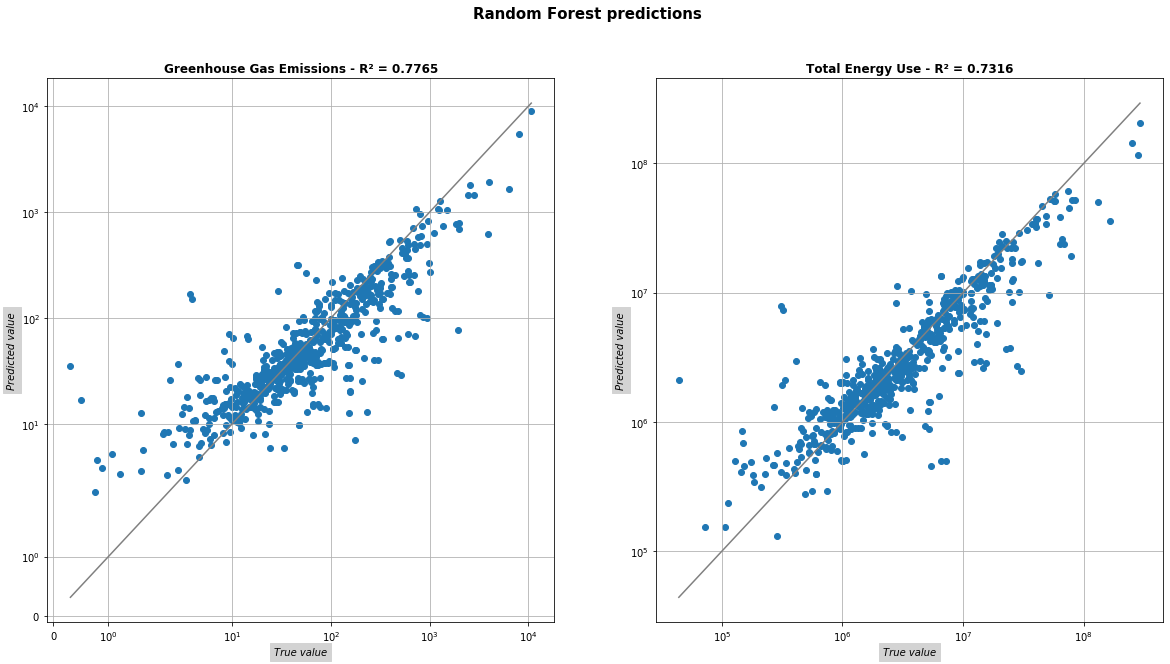

In [56]:
df_results = store_results(y_forest_log, 'forest_log', df_results)
plot_results(df_results, 'forest_log', 'Random Forest predictions', p_score = 'R²')

## Optimizing random forest with cross validation

### On target

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = {
        'max_depth' : [int(x) for x in np.linspace(4,15,num = 12)]  + [None],
        'max_features' : ['auto','sqrt']
    },
    cv = 5,
    scoring = 'r2'
)

In [58]:
# CV on target, optimizing R²
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)

rfr_cv = RandomForestRegressor(
    max_depth = best_params['max_depth'],
    max_features = best_params['max_features']
)

# Training
start_time = timeit.default_timer()
rfr_cv.fit(X_train, y_train)
end_time = timeit.default_timer()
time_rf_cv = end_time - start_time
print(time_rf_cv)

# Prediction and score
y_forest_cv = rfr_cv.predict(X_test)
score_predictions(y_test, pd.DataFrame(y_forest_cv))

{'max_depth': None, 'max_features': 'auto'}
4.825390199999902


,GHG emissions,Energy use
MSLE,0.6452,0.3337
R²,0.8709,0.9102


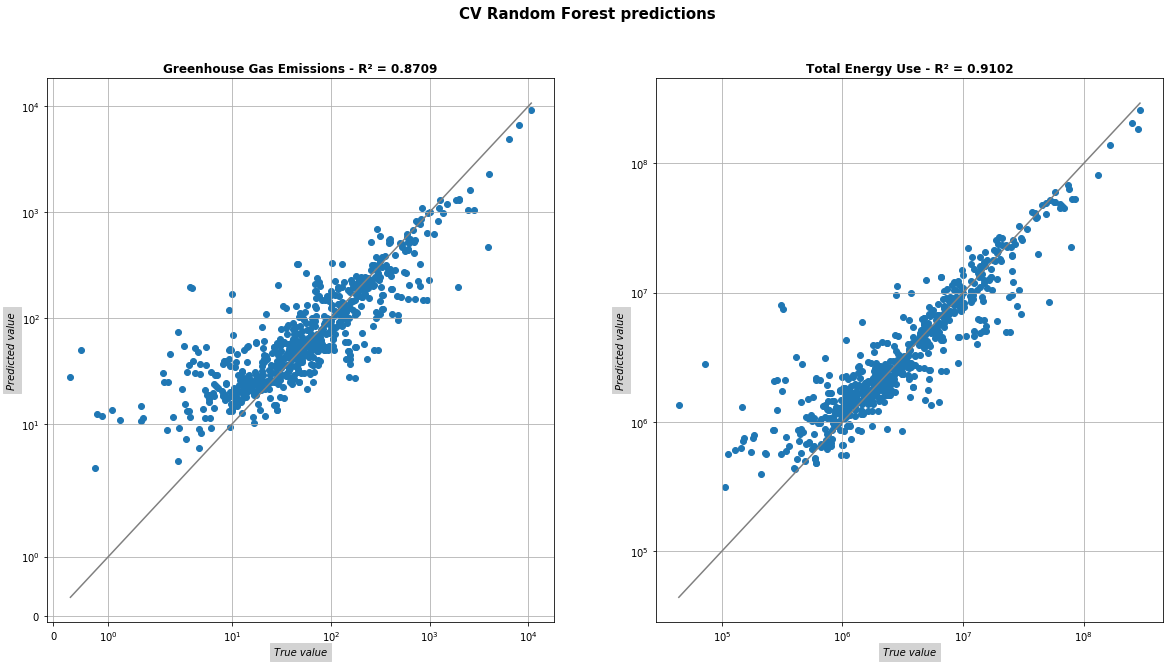

In [59]:
# Storing and visualisation
df_results = store_results(y_forest_cv, 'forest_cv', df_results)
plot_results(df_results, 'forest_cv', 'CV Random Forest predictions', p_score = 'R²')

### Cross-validation with log(y)

In [60]:
# Setting grid search
grid = GridSearchCV(
    estimator = RandomForestRegressor(n_estimators = 200),
    param_grid = {
        'max_depth' : [int(x) for x in np.linspace(4,15,num = 12)]  + [None],
        'max_features' : ['auto','sqrt']
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

In [61]:
# Grid Search
grid_result_log = grid.fit(X_train, np.log1p(y_train))
best_params_log = grid_result_log.best_params_
print(best_params_log)

rfr_cv_log = RandomForestRegressor(
    max_depth = best_params_log['max_depth'],
    max_features = best_params_log['max_features']
)

# Training
start_time = timeit.default_timer()
rfr_cv_log.fit(X_train, np.log1p(y_train))
end_time = timeit.default_timer()
time_rf_cv_log = end_time - start_time
print(time_rf_cv_log)

# Prediction and scores
y_forest_cv_log = np.expm1(rfr_cv_log.predict(X_test))
score_predictions(y_test, pd.DataFrame(y_forest_cv_log))

{'max_depth': None, 'max_features': 'auto'}
3.365736199999901


,GHG emissions,Energy use
MSLE,0.5905,0.3349
R²,0.7275,0.7874


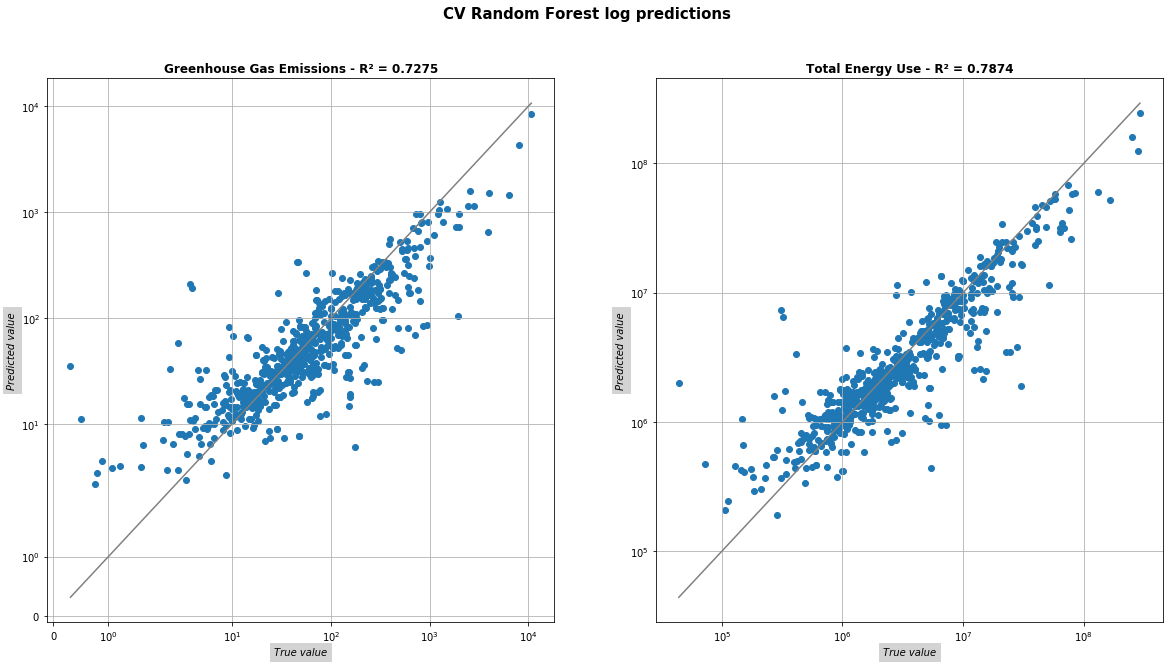

In [62]:
# Storage and visualisation
df_results = store_results(y_forest_cv_log, 'forest_cv_log', df_results)
plot_results(df_results, 'forest_cv_log', 'CV Random Forest log predictions', p_score = 'R²')

# Neural Network

## Trying neural-network

### Training on target

In [95]:
from sklearn.neural_network import MLPRegressor
mlp1 = MLPRegressor(
    hidden_layer_sizes = (X_test.shape[1], 50),
    activation = 'relu',
    early_stopping = True
)

# GHG Emissions
start_time = timeit.default_timer()
mlp1.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_mlp1 = end_time - start_time

y_mlp_ghg = mlp1.predict(X_test)

In [99]:
# Energy Use
mlp2 = MLPRegressor(
    hidden_layer_sizes = (X_test.shape[1], 50),
    activation = 'relu',
    early_stopping = False,
    max_iter = 500
)

start_time = timeit.default_timer()
mlp2.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_mlp2 = end_time - start_time

y_mlp_eng = mlp2.predict(X_test)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [100]:
print(time_mlp1 + time_mlp2)

# Displaying score
y_mlp = pd.DataFrame(np.array([y_mlp_ghg, y_mlp_eng]).T)
score_predictions(y_test, y_mlp)

22.813869000000068


,GHG emissions,Energy use
MSLE,1.6984,19.6100
R²,0.6497,0.2496


C:\Users\alexa_000\Documents\Alex\Data Science\Parcours Data Scientist\Projet 4 - Anticipez les besoins en consommation électrique de bâtiments\Projet\PElec_01_scripts.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storage[model_name + '_GHG'] = y.iloc[:,0].values
C:\Users\alexa_000\Documents\Alex\Data Science\Parcours Data Scientist\Projet 4 - Anticipez les besoins en consommation électrique de bâtiments\Projet\PElec_01_scripts.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storage[model_

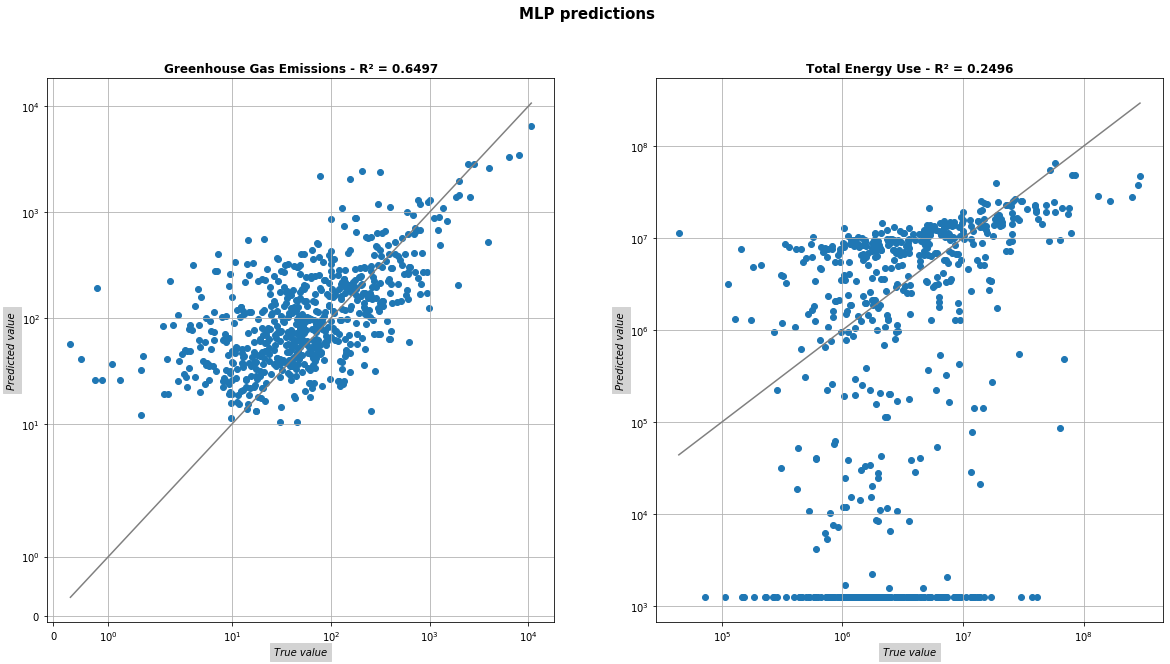

In [101]:
# Storage and Visualisation
df_results = store_results(y_mlp, 'mlp', df_results)
plot_results(df_results, 'mlp', 'MLP predictions', p_score = 'R²')

### Traning on log(target)

In [132]:
# GHG Emissions
mlp1 = MLPRegressor(
    hidden_layer_sizes = (X_test.shape[1], 100),
    activation = 'relu',
    early_stopping = False,
    max_iter = 500
)

start_time = timeit.default_timer()
mlp1.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_mlp1 = end_time - start_time

y_mlp_log_ghg = np.expm1(mlp1.predict(X_test))

# Energy Use
mlp2 = MLPRegressor(
    hidden_layer_sizes = (X_test.shape[1], 100),
    activation = 'relu',
    early_stopping = False,
    max_iter = 500
)

start_time = timeit.default_timer()
mlp2.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_mlp2 = end_time - start_time

y_mlp_log_eng = np.expm1(mlp2.predict(X_test))

print(time_mlp1 + time_mlp2)

# Displaying score
y_mlp_log = pd.DataFrame(np.array([y_mlp_log_ghg, y_mlp_log_eng]).T)
score_predictions(y_test, y_mlp_log)

15.129904099999749


,GHG emissions,Energy use
MSLE,1.0877,2.3402
R²,-12.3378,-1169.0449


C:\Users\alexa_000\Documents\Alex\Data Science\Parcours Data Scientist\Projet 4 - Anticipez les besoins en consommation électrique de bâtiments\Projet\PElec_01_scripts.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storage[model_name + '_GHG'] = y.iloc[:,0].values
C:\Users\alexa_000\Documents\Alex\Data Science\Parcours Data Scientist\Projet 4 - Anticipez les besoins en consommation électrique de bâtiments\Projet\PElec_01_scripts.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storage[model_

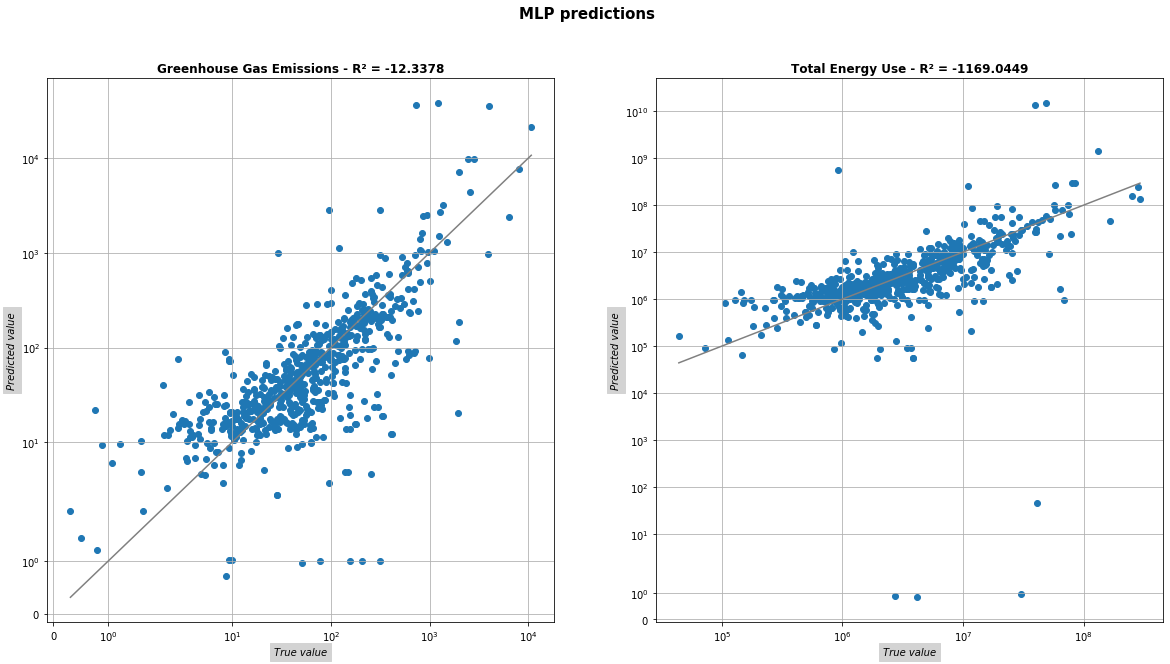

In [133]:
# Storage and Visualisation
df_results = store_results(y_mlp_log, 'mlp_log', df_results)
plot_results(df_results, 'mlp_log', 'MLP predictions', p_score = 'R²')

## Cross Validations

### Cross validation - R² on target

In [68]:
# Setting CV
grid_mlp =GridSearchCV(
    estimator = MLPRegressor(activation = 'relu', early_stopping = True, solver = 'lbfgs'),
    param_grid = {
        'hidden_layer_sizes' : [(X_test.shape[1], x) for x in np.arange(5,45,10)],
        'learning_rate' : ['constant', 'invscaling', 'adaptative' ],
        'alpha' : np.logspace(-5,5,11)
    },
    cv = 5,
    scoring = 'r2'
)

# Fitting GHG emissions
grid_result_ghg = grid_mlp.fit(X_train, y_train.iloc[:,0])
best_params_ghg = grid_result_ghg.best_params_
print(best_params_ghg)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'alpha': 10000.0, 'hidden_layer_sizes': (139, 5), 'learning_rate': 'constant'}


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [69]:
# Gas predictions with best params
mlp_cv_gas = MLPRegressor(
    activation = 'relu',
    early_stopping = True,
    solver = 'lbfgs',
    hidden_layer_sizes = best_params_ghg['hidden_layer_sizes'],
    learning_rate = best_params_ghg['learning_rate'],
    alpha = best_params_ghg['alpha']
)

start_time = timeit.default_timer()
mlp_cv_gas.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_mlp_cv_gas = end_time - start_time

y_mlp_cv_gas = mlp_cv_gas.predict(X_test)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
# Fitting Energy use
grid_result_eng = grid_mlp.fit(X_train, y_train.iloc[:,0])
best_params_eng = grid_result_eng.best_params_
print(best_params_eng)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'alpha': 10000.0, 'hidden_layer_sizes': (139, 25), 'learning_rate': 'constant'}


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [71]:
# Energy predictions with best params
mlp_cv_eng = MLPRegressor(
    activation = 'relu',
    early_stopping = True,
    solver = 'lbfgs',
    hidden_layer_sizes = best_params_eng['hidden_layer_sizes'],
    learning_rate = best_params_eng['learning_rate'],
    alpha = best_params_eng['alpha']
)

start_time = timeit.default_timer()
mlp_cv_eng.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_mlp_cv_eng = end_time - start_time

y_mlp_cv_eng = mlp_cv_eng.predict(X_test)

print(time_mlp_cv_gas + time_mlp_cv_eng)

13.09463919999962


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [72]:
# Scores
y_mlp_cv = pd.DataFrame(np.array([y_mlp_cv_gas, y_mlp_cv_eng]).T)
score_predictions(y_test, y_mlp_cv)

,GHG emissions,Energy use
MSLE,1.0931,0.8104
R²,0.9035,0.7280


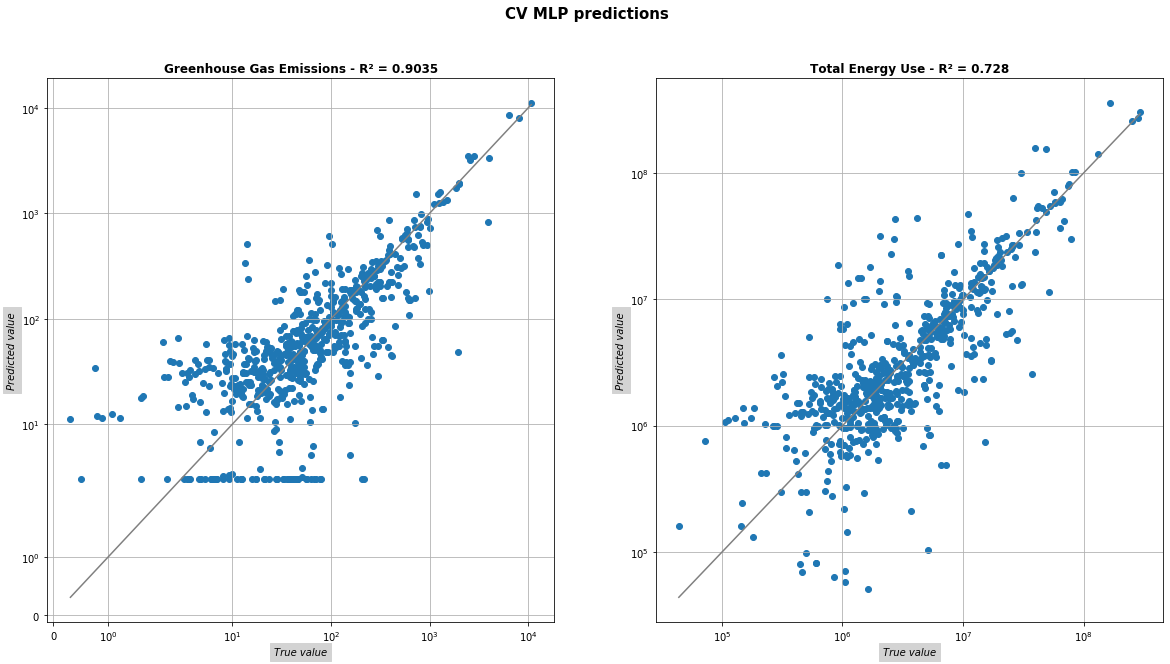

In [73]:
# Storage & Visualisation
df_results = store_results(y_mlp_cv, 'mlp_cv', df_results)
plot_results(df_results, 'mlp_cv', 'CV MLP predictions', p_score = 'R²')

### Cross validation - MSE on log(target)

In [83]:
# Setting CV
grid_mlp2 =GridSearchCV(
    estimator = MLPRegressor(activation = 'relu', early_stopping = True, solver = 'lbfgs'),
    param_grid = {
        'hidden_layer_sizes' : [(X_test.shape[1], x) for x in np.arange(5,45,10)],
        'learning_rate' : ['constant', 'invscaling', 'adaptative' ],
        'alpha' : np.logspace(-5,5,11)
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

# Fitting GHG emissions
grid_result_log_ghg = grid_mlp2.fit(X_train, np.log1p(y_train.iloc[:,0]))
best_params_log_ghg = grid_result_log_ghg.best_params_
print(best_params_log_ghg)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'alpha': 100.0, 'hidden_layer_sizes': (139, 25), 'learning_rate': 'invscaling'}


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [84]:
# Gas predictions with best params
mlp_cv_gas = MLPRegressor(
    activation = 'relu',
    early_stopping = True,
    solver = 'lbfgs',
    hidden_layer_sizes = best_params_log_ghg['hidden_layer_sizes'],
    learning_rate = best_params_log_ghg['learning_rate'],
    alpha = best_params_log_ghg['alpha']
)

start_time = timeit.default_timer()
mlp_cv_gas.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_mlp_cv_log_gas = end_time - start_time

y_mlp_cv_log_gas = np.expm1(mlp_cv_gas.predict(X_test))

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [85]:
# Fitting Energy use
grid_result_log_eng = grid_mlp2.fit(X_train, np.log1p(y_train.iloc[:,1]))
best_params_log_eng = grid_result_log_eng.best_params_
print(best_params_log_eng)

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'alpha': 100.0, 'hidden_layer_sizes': (139, 35), 'learning_rate': 'constant'}


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [86]:
# Energy predictions with best params
mlp_cv_log_eng = MLPRegressor(
    activation = 'relu',
    early_stopping = True,
    solver = 'lbfgs',
    hidden_layer_sizes = best_params_log_eng['hidden_layer_sizes'],
    learning_rate = best_params_log_eng['learning_rate'],
    alpha = best_params_log_eng['alpha']
)

mlp_cv_log_eng.fit(X_train, np.log1p(y_train.iloc[:,1]))

start_time = timeit.default_timer()
y_mlp_cv_log_eng = np.expm1(mlp_cv_log_eng.predict(X_test))
end_time = timeit.default_timer()
time_mlp_cv_log_eng = end_time - start_time

print(time_mlp_cv_log_gas + time_mlp_cv_log_eng)

7.691854800001238


C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [87]:
# Scores
y_mlp_cv_log = pd.DataFrame(np.array([y_mlp_cv_log_gas, y_mlp_cv_log_eng]).T)
score_predictions(y_test, y_mlp_cv_log)

,GHG emissions,Energy use
MSLE,0.8132,0.4343
R²,0.8320,0.7929


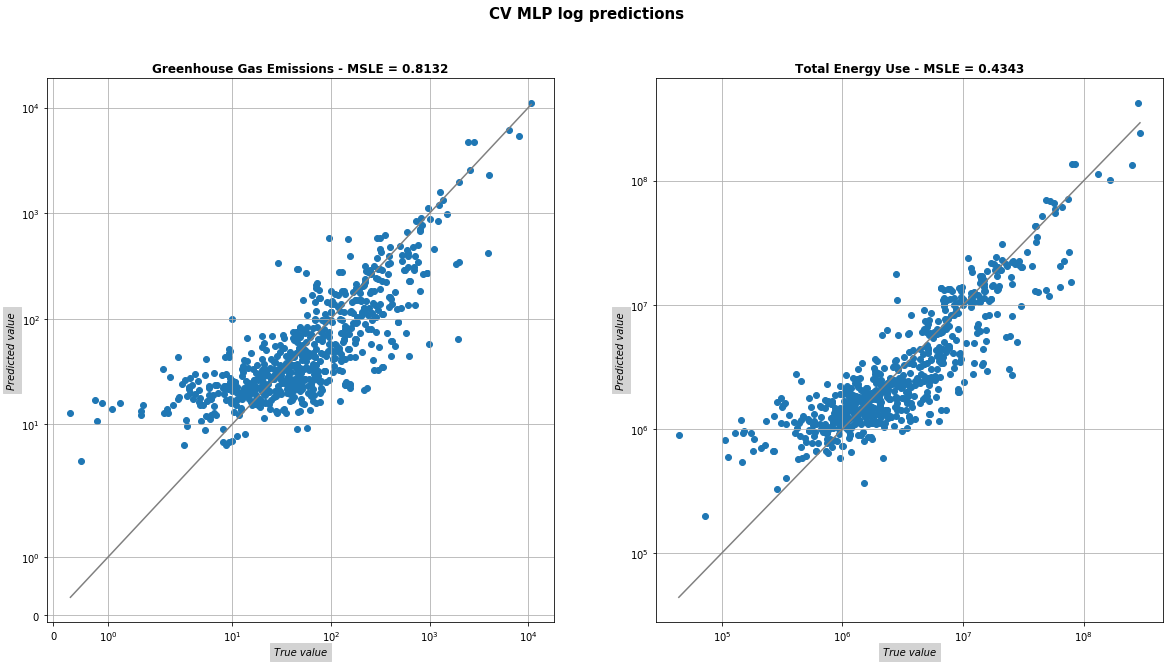

In [88]:
# Storage & Visualisation
df_results = store_results(y_mlp_cv_log, 'mlp_cv_log', df_results)
plot_results(df_results, 'mlp_cv_log', 'CV MLP log predictions', p_score = 'MSLE')

# Support Vector Regression

## Trying SVR

### Training on target

In [89]:
from sklearn import svm
svr = svm.SVR()

# GHG Emissions
start_time = timeit.default_timer()
svr.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_svr1 = end_time - start_time

y_svr_gas = svr.predict(X_test)

# Energy use
start_time = timeit.default_timer()
svr.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_svr2 = end_time - start_time

y_svr_eng = svr.predict(X_test)

# Time and scores
print(time_svr1 + time_svr2)
y_svr = pd.DataFrame(np.array([y_svr_gas, y_svr_eng]).T)
score_predictions(y_test, y_svr)

2.676695699999982


,GHG emissions,Energy use
MSLE,1.8104,1.8011
R²,-0.0306,-0.0652


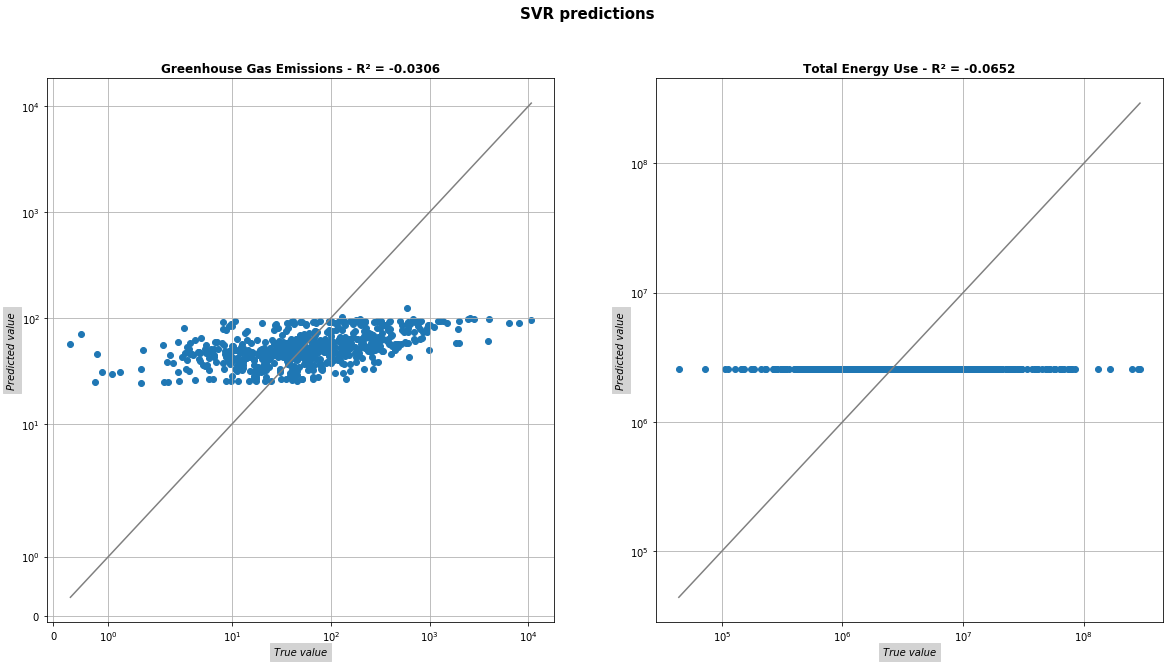

In [90]:
# Storage and Visualisation
df_results = store_results(y_svr, 'SVR', df_results)
plot_results(df_results, 'SVR', 'SVR predictions', p_score = 'R²')

In [91]:
# Training with different kernel
svr.set_params(kernel = 'poly')

# GHG Emissions
start_time = timeit.default_timer()
svr.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_svr1 = end_time - start_time

y_svr_gas = svr.predict(X_test)

# Energy use
start_time = timeit.default_timer()
svr.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_svr2 = end_time - start_time

y_svr_eng = svr.predict(X_test)

# Time and scores
print(time_svr1 + time_svr2)
y_svr = pd.DataFrame(np.array([y_svr_gas, y_svr_eng]).T)
score_predictions(y_test, y_svr)

2.1403790000003937


,GHG emissions,Energy use
MSLE,1.8868,1.8010
R²,0.0162,-0.0652


Hyper paramètres à ajuster : C (paramètre de régularisation), kernel (type de noyau), paramètre gamma (si noyau gaussien)

### Training on log(target)

In [92]:
# GHG Emissions
start_time = timeit.default_timer()
svr.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_svr1 = end_time - start_time

y_svr_log_gas = np.expm1(svr.predict(X_test))

# Energy use
start_time = timeit.default_timer()
svr.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_svr2 = end_time - start_time

y_svr_log_eng = np.expm1(svr.predict(X_test))

# Time and scores
print(time_svr1 + time_svr2)
y_svr_log = pd.DataFrame(np.array([y_svr_log_gas, y_svr_log_eng]).T)
score_predictions(y_test, y_svr_log)

2.1604802000038035


,GHG emissions,Energy use
MSLE,1.5684,1.1423
R²,-125.6646,-57.1051


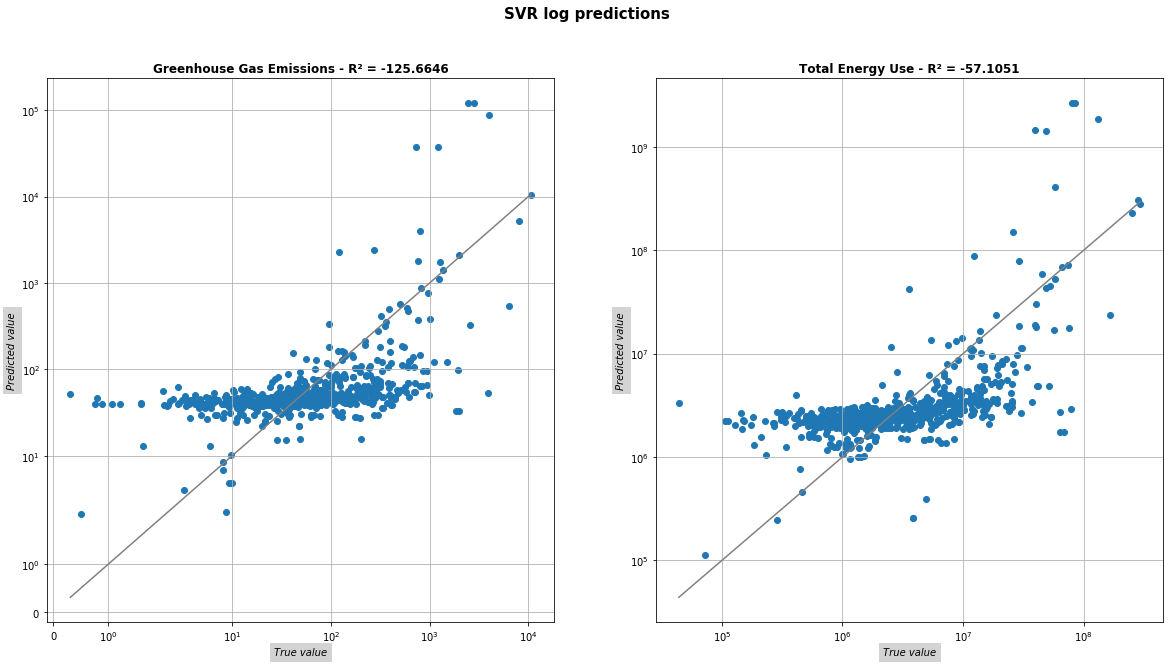

In [93]:
# Storage and Visualisation
df_results = store_results(y_svr_log, 'SVR_log', df_results)
plot_results(df_results, 'SVR_log', 'SVR log predictions', p_score = 'R²')

## Cross Validations

### On target

In [94]:
# Setting cross validation
grid_svr1 =GridSearchCV(
    estimator = svm.SVR(),
    param_grid = {
        'C' : np.logspace(-5, 5, 11),
        'gamma' : np.logspace(-5,5,11)
    },
    cv = 5,
    scoring = 'r2'
)

In [95]:
# Grid Search for gas emissions
grid_result = grid_svr1.fit(X_train, y_train.iloc[:,0])
best_params = grid_result.best_params_
print(best_params)

# Training
svr_cv = svm.SVR(C = best_params['C'], gamma = best_params['gamma'])

start_time = timeit.default_timer()
svr_cv.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_svr_cv1 = end_time - start_time

y_svr_cv_ghg = svr_cv.predict(X_test)

{'C': 100000.0, 'gamma': 0.0001}


In [96]:
# Grid Search for energy use
grid_result = grid_svr1.fit(X_train, y_train.iloc[:,1])
best_params = grid_result.best_params_
print(best_params)

# Training
svr_cv = svm.SVR(C = best_params['C'], gamma = best_params['gamma'])

start_time = timeit.default_timer()
svr_cv.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_svr_cv2 = end_time - start_time

y_svr_cv_eng = svr_cv.predict(X_test)

{'C': 100000.0, 'gamma': 0.01}


In [97]:
# Time and scores
print(time_svr_cv1 + time_svr_cv2)
y_svr_cv = pd.DataFrame(np.array([y_svr_cv_ghg, y_svr_cv_eng]).T)
score_predictions(y_test, y_svr_cv)

3.974051999997755


,GHG emissions,Energy use
MSLE,NaN,1.1848
R²,0.8549,-0.0064


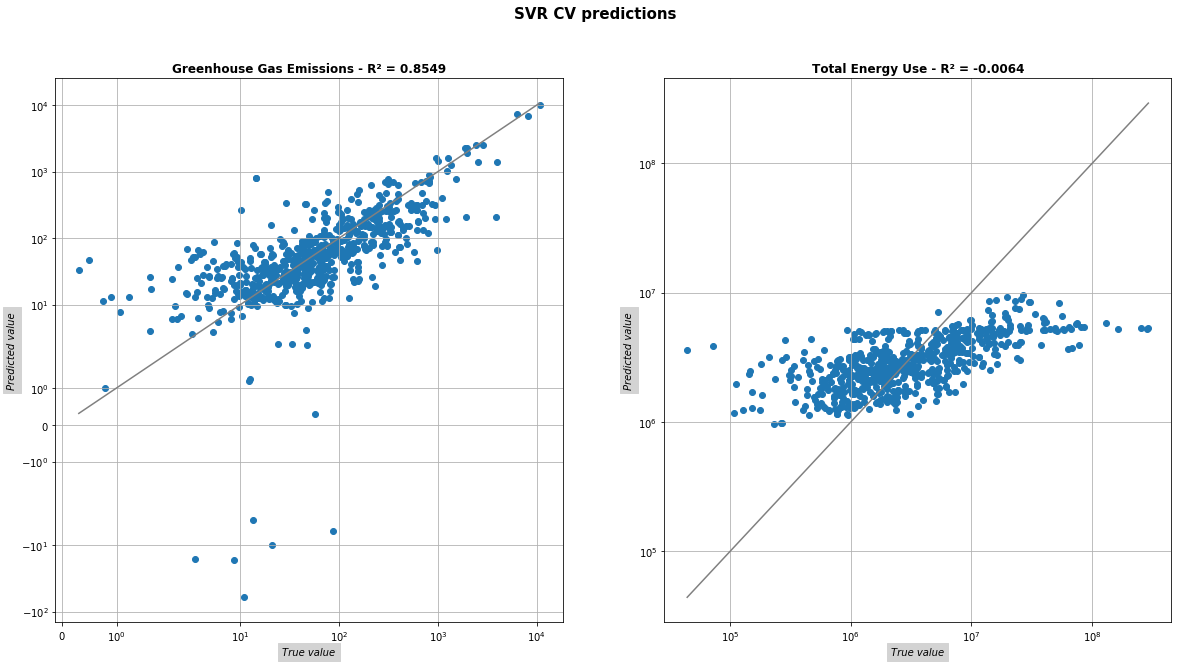

In [98]:
# Storage and Visualisation
df_results = store_results(y_svr_cv, 'SVR_cv', df_results)
plot_results(df_results, 'SVR_cv', 'SVR CV predictions', p_score = 'R²')

### On log(target)

In [99]:
# Setting cross validation
grid_svr2 =GridSearchCV(
    estimator = svm.SVR(),
    param_grid = {
        'C' : np.logspace(-5, 5, 11),
        'gamma' : np.logspace(-5,5,11)
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

In [100]:
# Grid Search for gas emissions
grid_result = grid_svr2.fit(X_train, np.log1p(y_train.iloc[:,0]))
best_params = grid_result.best_params_
print(best_params)

# Training
svr_cv_log = svm.SVR(C = best_params['C'], gamma = best_params['gamma'])

start_time = timeit.default_timer()
svr_cv_log.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_svr_cv_log1 = end_time - start_time

y_svr_cv_log_ghg = np.expm1(svr_cv_log.predict(X_test))

{'C': 10.0, 'gamma': 0.01}


In [101]:
# Grid Search for energy use
grid_result = grid_svr2.fit(X_train, np.log1p(y_train.iloc[:,1]))
best_params = grid_result.best_params_
print(best_params)

# Training
svr_cv_log = svm.SVR(C = best_params['C'], gamma = best_params['gamma'])

start_time = timeit.default_timer()
svr_cv_log.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_svr_cv_log2 = end_time - start_time

y_svr_cv_log_eng = np.expm1(svr_cv_log.predict(X_test))

{'C': 10.0, 'gamma': 0.01}


In [102]:
# Time and scores
print(time_svr_cv_log1 + time_svr_cv_log2)
y_svr_cv_log = pd.DataFrame(np.array([y_svr_cv_log_ghg, y_svr_cv_log_eng]).T)
score_predictions(y_test, y_svr_cv_log)

2.6624875999987125


,GHG emissions,Energy use
MSLE,0.7957,0.4199
R²,0.7653,0.8443


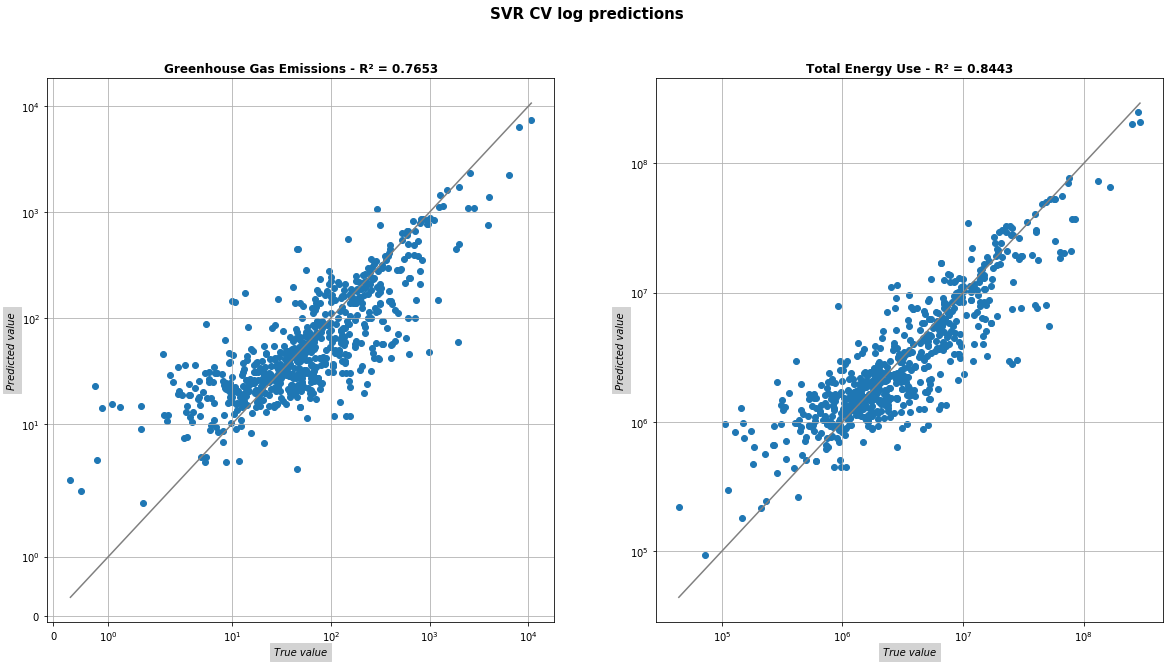

In [104]:
# Storage and Visualisation
df_results = store_results(y_svr_cv_log, 'SVR_cv_log', df_results)
plot_results(df_results, 'SVR_cv_log', 'SVR CV log predictions', p_score = 'R²')

# Training a Gradient Boosting Regressor

## Trying GBR 

### On target

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    init = sklearn.tree.DecisionTreeRegressor(), 
    n_estimators = 500)

# Gas Emissions
start_time = timeit.default_timer()
gbr.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_gbr1 = end_time - start_time

y_gbr_ghg = gbr.predict(X_test)

# Energy Use
start_time = timeit.default_timer()
gbr.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_gbr2 = end_time - start_time

y_gbr_eng = gbr.predict(X_test)

In [107]:
# Time and scores
print(time_gbr1 + time_gbr2)
y_gbr = pd.DataFrame(np.array([y_gbr_ghg, y_gbr_eng]).T)
score_predictions(y_test, y_gbr)

6.735259600001882


,GHG emissions,Energy use
MSLE,0.7548,0.3633
R²,0.8277,0.8817


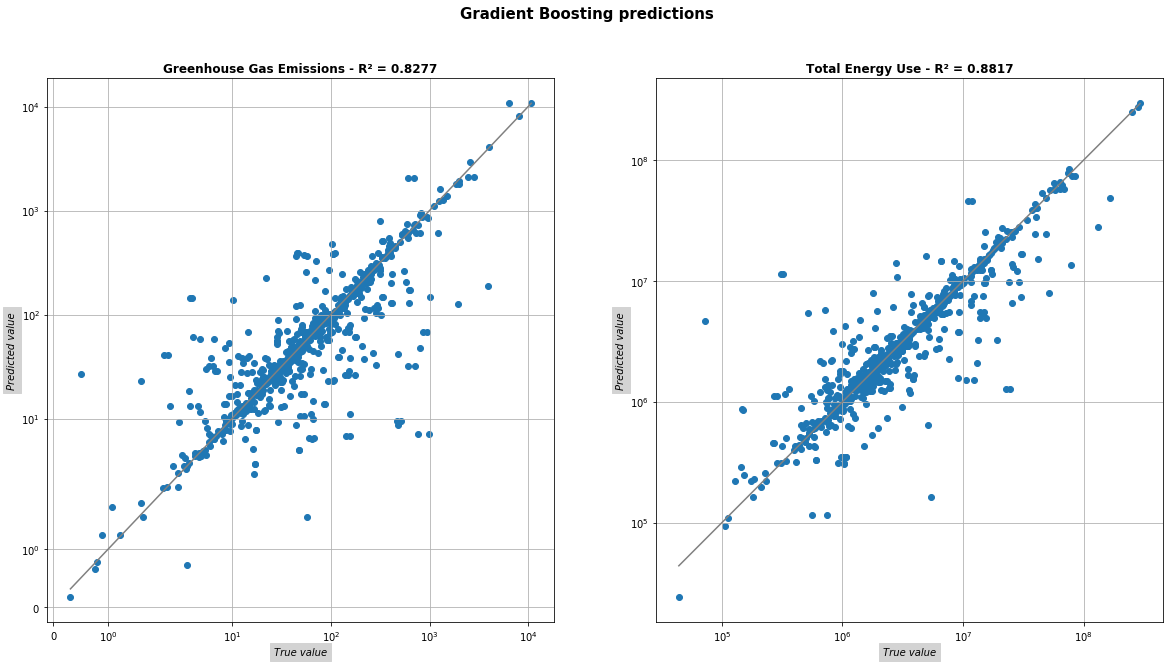

In [108]:
# Storage and Visualisation
df_results = store_results(y_gbr, 'GBR', df_results)
plot_results(df_results, 'GBR', 'Gradient Boosting predictions', p_score = 'R²')

### On log(target)

In [109]:
# Gas Emissions
start_time = timeit.default_timer()
gbr.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_gbr1 = end_time - start_time

y_gbr_log_ghg = np.expm1(gbr.predict(X_test))

# Energy Use
start_time = timeit.default_timer()
gbr.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_gbr2 = end_time - start_time

y_gbr_log_eng = np.expm1(gbr.predict(X_test))

In [110]:
# Time and scores
print(time_gbr1 + time_gbr2)
y_gbr_log = pd.DataFrame(np.array([y_gbr_log_ghg, y_gbr_log_eng]).T)
score_predictions(y_test, y_gbr_log)

8.859555199996976


,GHG emissions,Energy use
MSLE,0.6681,0.6414
R²,0.8446,0.8429


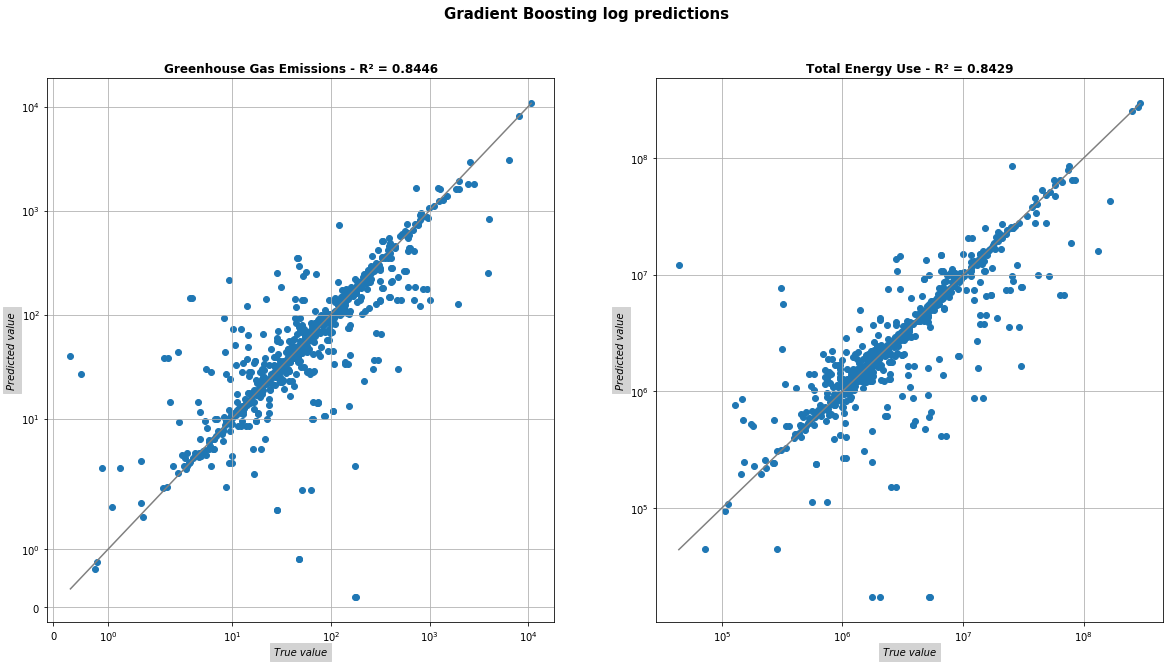

In [111]:
# Storage and Visualisation
df_results = store_results(y_gbr_log, 'GBR_log', df_results)
plot_results(df_results, 'GBR_log', 'Gradient Boosting log predictions', p_score = 'R²')

## Cross Validations

### On target

In [184]:
# Setting CV
grid_gbr1 =GridSearchCV(
    estimator = GradientBoostingRegressor(
        init = sklearn.tree.DecisionTreeRegressor(),
        n_estimators = 500,
        n_iter_no_change = 50
    ),
    param_grid = {
        'subsample' : [0.4, 0.6, 0.8, 1],
        'learning_rate' : np.logspace(-5,0,6),
        'max_features' : ['auto', 'sqrt','log2'],
        'max_depth' : np.arange(4,10,1)
    },
    cv = 5,
    scoring = 'r2'
)


In [185]:
# GridSearch on Gas Emissions
grid_result = grid_gbr1.fit(X_train, y_train.iloc[:,0])
best_params = grid_result.best_params_
print(best_params)

# Training
gbr.set_params(subsample = best_params['subsample'],
               learning_rate = best_params['learning_rate'],
               max_features = best_params['max_features'],
               max_depth = best_params['max_depth']
              )

start_time = timeit.default_timer()
gbr.fit(X_train, y_train.iloc[:,0])
end_time = timeit.default_timer()
time_gbr_cv1 = end_time - start_time

y_gbr_cv_ghg = gbr.predict(X_test)

{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'log2', 'subsample': 0.4}


In [186]:
# GridSearch on Energy use
grid_result = grid_gbr1.fit(X_train, y_train.iloc[:,1])
best_params = grid_result.best_params_
print(best_params)

# Training
gbr.set_params(subsample = best_params['subsample'],
               learning_rate = best_params['learning_rate'],
               max_features = best_params['max_features'],
               max_depth = best_params['max_depth']
              )

start_time = timeit.default_timer()
gbr.fit(X_train, y_train.iloc[:,1])
end_time = timeit.default_timer()
time_gbr_cv2 = end_time - start_time

y_gbr_cv_eng = gbr.predict(X_test)

{'learning_rate': 0.0001, 'max_depth': 7, 'max_features': 'auto', 'subsample': 0.8}


In [187]:
# Time and scores
print(time_gbr_cv1 + time_gbr_cv2)
y_gbr_cv = pd.DataFrame(np.array([y_gbr_cv_ghg, y_gbr_cv_eng]).T)
score_predictions(y_test, y_gbr_cv)

4.713290200001211


,GHG emissions,Energy use
MSLE,0.8165,0.3361
R²,0.8811,0.8893


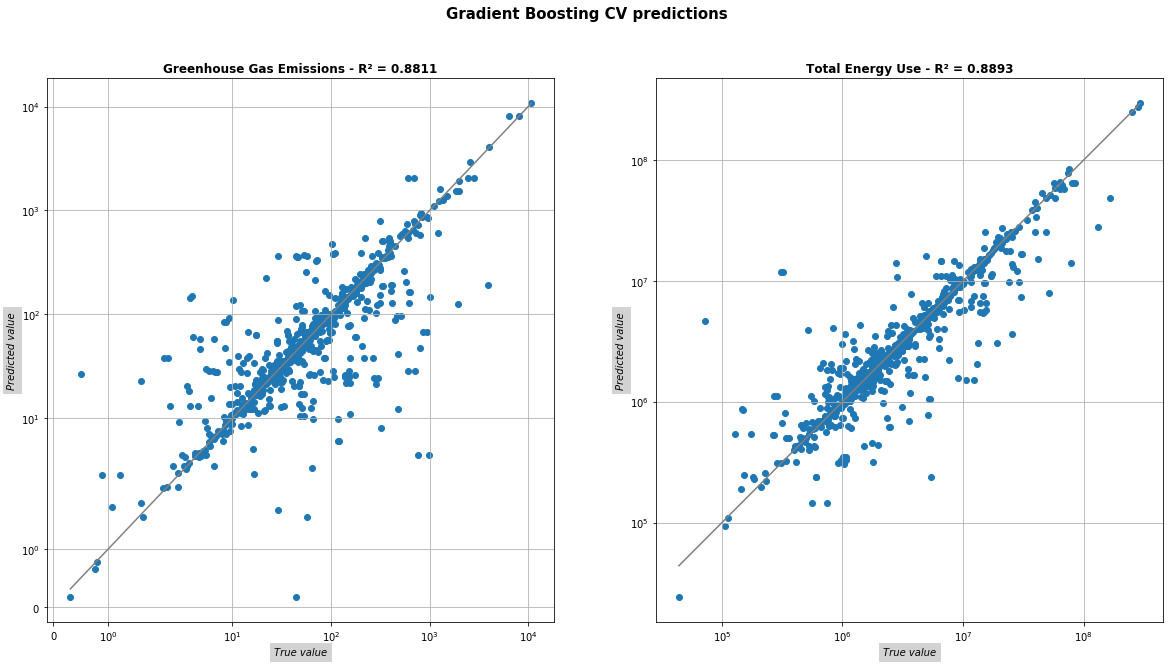

In [188]:
# Storage and Visualisation
df_results = store_results(y_gbr_cv, 'GBR_cv', df_results)
plot_results(df_results, 'GBR_cv', 'Gradient Boosting CV predictions', p_score = 'R²')

### On log(target)

In [189]:
# Setting CV
grid_gbr2 =GridSearchCV(
    estimator = GradientBoostingRegressor(
        init = sklearn.tree.DecisionTreeRegressor(),
        n_estimators = 500,
        n_iter_no_change = 50
    ),
    param_grid = {
        'subsample' : [0.4, 0.6, 0.8, 1],
        'learning_rate' : np.logspace(-5,0,6),
        'max_features' : ['auto', 'sqrt','log2'],
        'max_depth' : np.arange(4,10,1)
    },
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

In [190]:
# CV on Gas emissions
grid_result = grid_gbr2.fit(X_train, np.log1p(y_train.iloc[:,0]))
best_params = grid_result.best_params_
print(best_params)

# Training
gbr2 = GradientBoostingRegressor(
    n_estimators = 500,
    init = sklearn.tree.DecisionTreeRegressor(),
    subsample = best_params['subsample'],
    learning_rate = best_params['learning_rate'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'])

start_time = timeit.default_timer()
gbr2.fit(X_train, np.log1p(y_train.iloc[:,0]))
end_time = timeit.default_timer()
time_gbr_cv_log1 = end_time - start_time

y_gbr_cv_log_ghg = np.expm1(gbr2.predict(X_test))

{'learning_rate': 1e-05, 'max_depth': 7, 'max_features': 'sqrt', 'subsample': 0.6}


In [191]:
# CV on energy use
grid_result = grid_gbr2.fit(X_train, np.log1p(y_train.iloc[:,1]))
best_params = grid_result.best_params_
print(best_params)

# Training
gbr2 = GradientBoostingRegressor(
    n_estimators = 500,
    init = sklearn.tree.DecisionTreeRegressor(),
    subsample = best_params['subsample'],
    learning_rate = best_params['learning_rate'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'])

start_time = timeit.default_timer()
gbr2.fit(X_train, np.log1p(y_train.iloc[:,1]))
end_time = timeit.default_timer()
time_gbr_cv_log2 = end_time - start_time

y_gbr_cv_log_eng = np.expm1(gbr2.predict(X_test))

{'learning_rate': 0.001, 'max_depth': 5, 'max_features': 'log2', 'subsample': 1}


In [192]:
# Time and scores
print(time_gbr_cv_log1 + time_gbr_cv_log2)
y_gbr_cv_log = pd.DataFrame(np.array([y_gbr_cv_log_ghg, y_gbr_cv_log_eng]).T)
score_predictions(y_test, y_gbr_cv_log)

1.305711999997584


,GHG emissions,Energy use
MSLE,0.7001,0.5683
R²,0.8712,0.8525


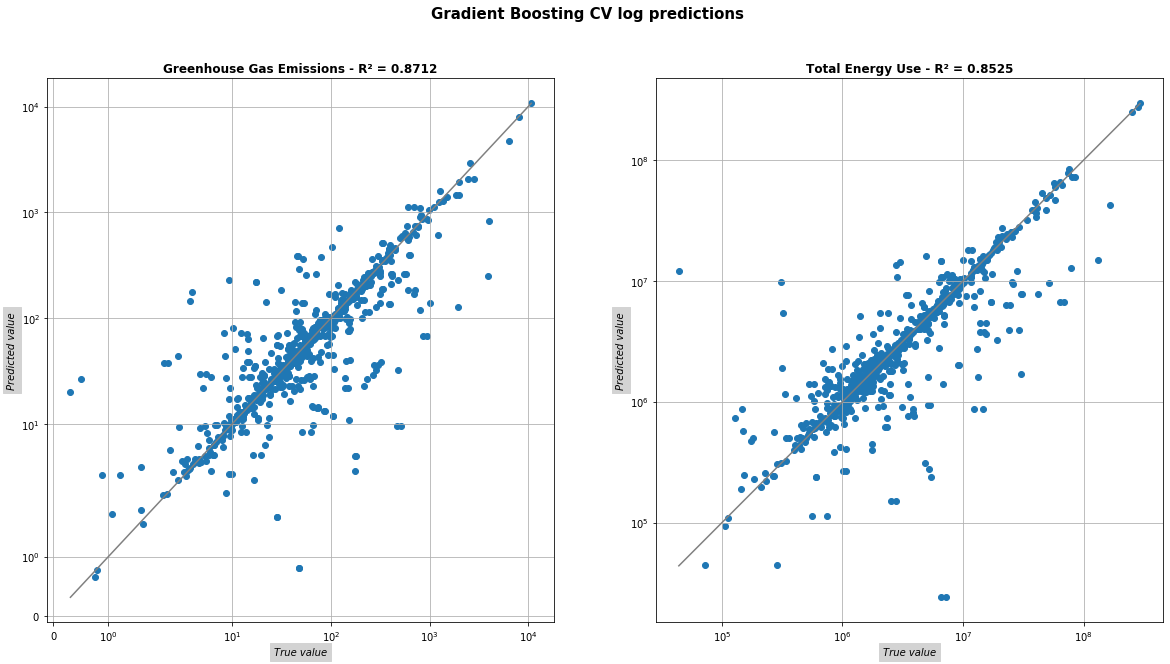

In [194]:
# Storage and Visualisation
df_results = store_results(y_gbr_cv_log, 'GBR_cv_log', df_results)
plot_results(df_results, 'GBR_cv_log', 'Gradient Boosting CV log predictions', p_score = 'R²')

# Light Gradient boosting

## Trying light GBM

### Testing on ghg and energy

In [159]:
import lightgbm
train_data_ghg = lightgbm.Dataset(X_train, label = y_train.iloc[:,0])

parameters = {
    'objective': 'regression',
    'metric': 'rmse'
}

# Gas Emissions
start_time = timeit.default_timer()
model = lightgbm.train(parameters,
                       train_data_ghg,
                       valid_sets=None,
                       num_boost_round = 5000)

end_time = timeit.default_timer()
time_lgb1 = end_time - start_time

y_lgb_ghg = model.predict(X_test)

# Energy
train_data_eng = lightgbm.Dataset(X_train, label = y_train.iloc[:,1])

start_time = timeit.default_timer()
model = lightgbm.train(parameters,
                       train_data_eng,
                       valid_sets=None,
                       num_boost_round = 5000)

end_time = timeit.default_timer()
time_lgb2 = end_time - start_time

y_lgb_eng = model.predict(X_test)

In [160]:
print(time_lgb1 + time_lgb2)
y_lgb = np.array([y_lgb_ghg, y_lgb_eng]).T
df_results = store_results(y_lgb, 'lightGBM', df_results.copy())
score_predictions(y_test, df_results[['lightGBM_GHG', 'lightGBM_Energy']])

25.854778900000383


,GHG emissions,Energy use
MSLE,NaN,NaN
R²,0.8249,0.8833


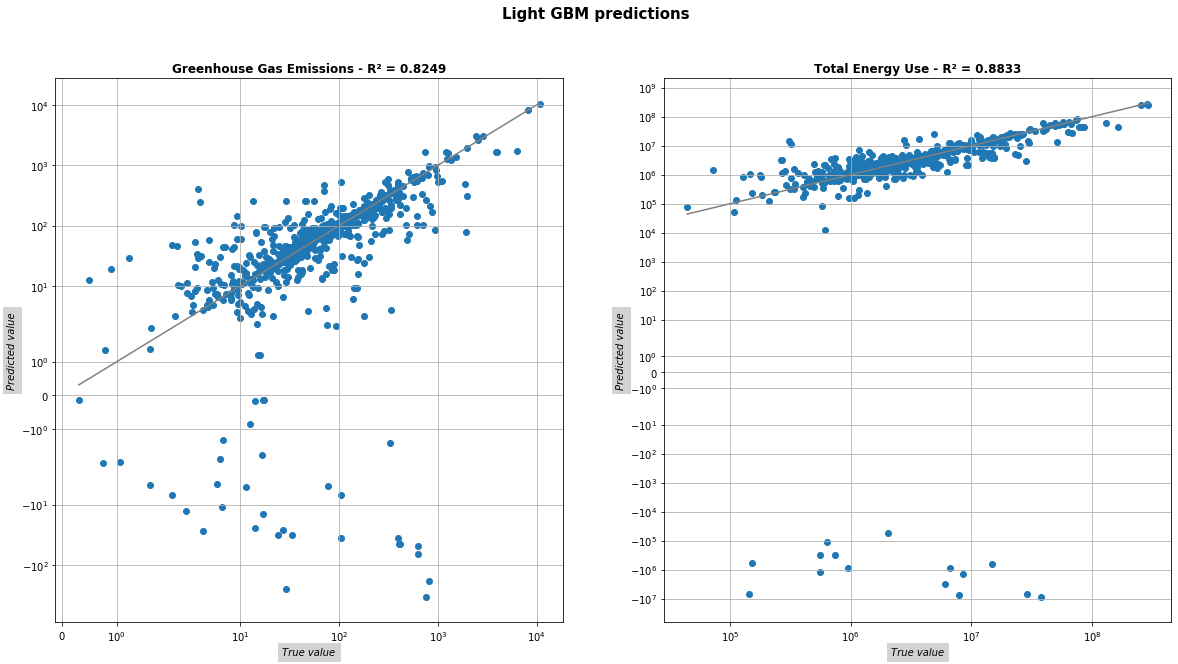

In [161]:
plot_results(df_results, 'lightGBM', 'Light GBM predictions', p_score = 'R²')

### Testing with log(y)

In [115]:
# Gas Emissions
train_data = lightgbm.Dataset(X_train, label = np.log1p(y_train.iloc[:,0]))

start_time = timeit.default_timer()
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=None,
                       num_boost_round=5000)
end_time = timeit.default_timer()
time_lgb1 = end_time - start_time

y_lgb_log_ghg = np.expm1(model.predict(X_test))

In [116]:
# Energy use
train_data = lightgbm.Dataset(X_train, label = np.log1p(y_train.iloc[:,1]))

start_time = timeit.default_timer()
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=None,
                       num_boost_round=5000)
end_time = timeit.default_timer()
time_lgb2 = end_time - start_time

y_lgb_log_eng = np.expm1(model.predict(X_test))

In [121]:
time_lgb1 + time_lgb2

22.418212299995503

In [122]:
y_lgb_log = np.array([y_lgb_log_ghg, y_lgb_log_eng]).T
df_results = store_results(y_lgb_log, 'lightGBM_log', df_results)
score_predictions(y_test, df_results[['lightGBM_log_GHG', 'lightGBM_log_Energy']])

,GHG emissions,Energy use
MSLE,0.5107,0.2730
R²,0.7987,0.8829


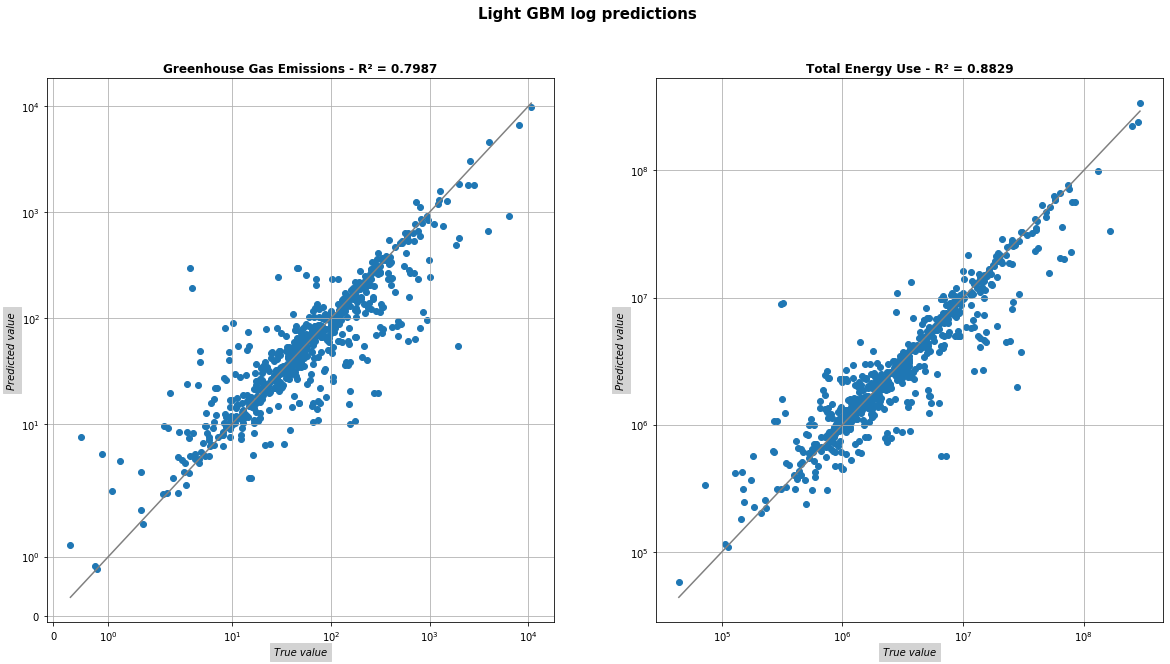

In [123]:
plot_results(df_results, 'lightGBM_log', 'Light GBM log predictions', p_score = 'R²')

## Cross Validation

### On target

In [175]:
# Mini CV for gas emissions
best_score = 0
max_depth = [5, 8, 12, 15, -1]

for depth in max_depth:
    parameters = {
        'objective': 'regression',
        'metric': 'mse',
        'max_depth' : depth
    } 
    
    model_cv = lightgbm.train(
        parameters, 
        train_set = lightgbm.Dataset(X_train, label = y_train.iloc[:,0]),
        valid_sets=None,
        num_boost_round=5000
    )
    
    y = model_cv.predict(X_test)
    score = r2_score(y_test.iloc[:,0], y)
    if score > best_score:
        best_score = score
        best_param = depth
        best_prediction = y
        
y_light_cv_ghg = best_prediction
print(best_param, best_score)

8 0.8374794967225092


In [176]:
# Mini CV for gas emissions
best_score = 0
max_depth = [5, 8, 12, 15, -1]

for depth in max_depth:
    parameters = {
        'objective': 'regression',
        'metric': 'mse',
        'max_depth' : depth
    } 
    
    model_cv = lightgbm.train(
        parameters, 
        train_set = lightgbm.Dataset(X_train, label = y_train.iloc[:,1]),
        valid_sets=None,
        num_boost_round=5000
    )
    
    y = model_cv.predict(X_test)
    score = r2_score(y_test.iloc[:,1], y)
    if score > best_score:
        best_score = score
        best_param = depth
        best_prediction = y
        
y_light_cv_eng = best_prediction
print(best_param, best_score)

15 0.8883494155603117


In [177]:
# Scores
y_light_cv = pd.DataFrame(np.array([y_light_cv_ghg, y_light_cv_eng]).T)
score_predictions(y_test, y_light_cv)

,GHG emissions,Energy use
MSLE,NaN,NaN
R²,0.8375,0.8883


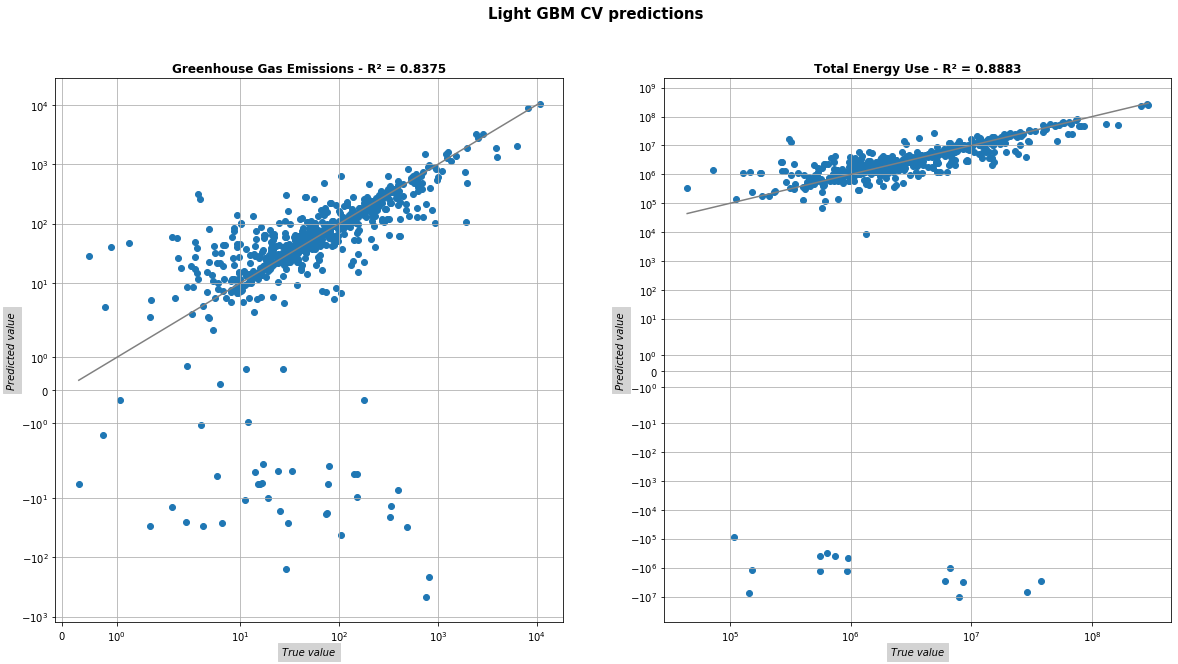

In [178]:
# Storage and Visualisation
df_results = store_results(y_light_cv, 'light_cv', df_results)
plot_results(df_results, 'light_cv', 'Light GBM CV predictions', p_score = 'R²')

### On log(target)

In [168]:
# Mini CV for gas emissions
best_score = 0
max_depth = [5, 8, 12, 15, -1]

for depth in max_depth:
    parameters = {
        'objective': 'regression',
        'metric': 'rmse',
        'max_depth' : depth
    } 
    
    model_cv = lightgbm.train(
        parameters, 
        train_set = lightgbm.Dataset(X_train, label = np.log1p(y_train.iloc[:,0])),
        valid_sets=None,
        num_boost_round=5000
    )
    
    y = np.expm1(model_cv.predict(X_test))
    score = r2_score(y_test.iloc[:,0], y)
    if score > best_score:
        best_score = score
        best_param = depth
        best_prediction = y
        
y_light_cv_log_ghg = best_prediction
print(best_param, best_score)

15 0.8094347856816464


In [169]:
# Mini CV for energy use
best_score = 0
max_depth = [5, 8, 12, 15, -1]

for depth in max_depth:
    parameters = {
        'objective': 'regression',
        'metric': 'rmse',
        'max_depth' : depth
    } 
    
    model_cv = lightgbm.train(
        parameters, 
        train_set = lightgbm.Dataset(X_train, label = np.log1p(y_train.iloc[:,1])),
        valid_sets=None,
        num_boost_round=5000
    )
    
    y = np.expm1(model_cv.predict(X_test))
    score = r2_score(y_test.iloc[:,1], y)
    if score > best_score:
        best_score = score
        best_param = depth
        best_prediction = y
        
y_light_cv_log_eng = best_prediction
print(best_param, best_score)

8 0.8945251404782624


In [172]:
# Scores
y_light_cv_log = pd.DataFrame(np.array([y_light_cv_log_ghg, y_light_cv_log_eng]).T)
score_predictions(y_test, y_light_cv_log)

,GHG emissions,Energy use
MSLE,0.4836,0.2927
R²,0.8094,0.8945


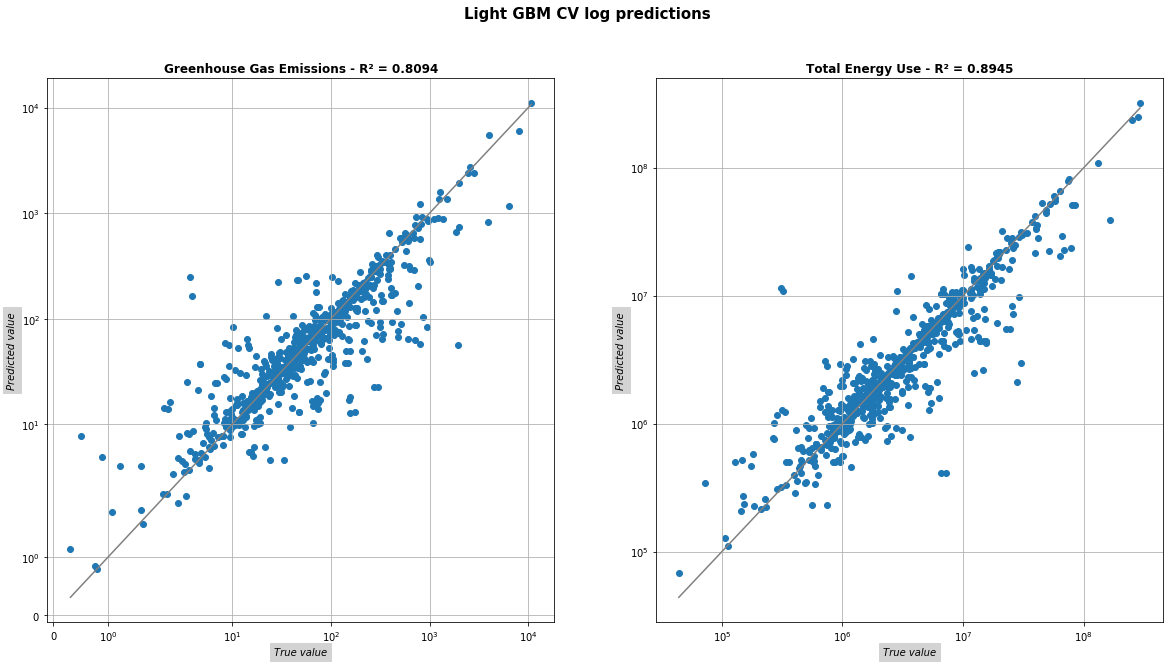

In [173]:
# Storage and Visualisation
df_results = store_results(y_light_cv_log, 'light_cv_log', df_results)
plot_results(df_results, 'light_cv_log', 'Light GBM CV log predictions', p_score = 'R²')

# AdaBoost

## Testing

In [179]:
# GHG
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(max_depth = 10),
    n_estimators = 200,
    loss = 'square'
)

ada.fit(X_train, y_train.iloc[:,0])
y_ada_ghg = ada.predict(X_test)

# Energy
ada.fit(X_train, y_train.iloc[:,1])
y_ada_eng = ada.predict(X_test)

# Scores
score_predictions(y_test, pd.DataFrame([y_ada_ghg, y_ada_eng]).T)

,GHG emissions,Energy use
MSLE,2.3051,2.1902
R²,0.9000,0.8976


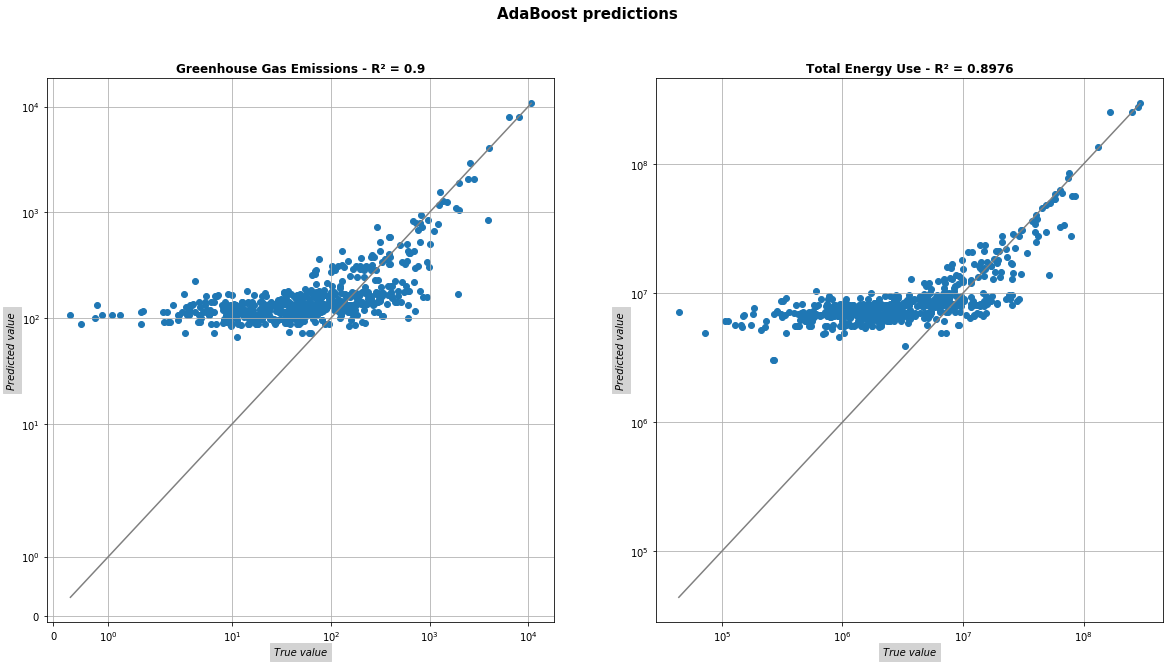

In [180]:
df_results = store_results(np.array([y_ada_ghg, y_ada_eng]).T, 'ada', df_results)
plot_results(df_results, 'ada', 'AdaBoost predictions', p_score = 'R²')

## Log predictions

In [182]:
# GHG
ada.fit(X_train, np.log1p(y_train.iloc[:,0]))
y_ada_log_ghg = np.expm1(ada.predict(X_test))

# Energy
ada.fit(X_train, np.log1p(y_train.iloc[:,1]))
y_ada_log_eng = np.expm1(ada.predict(X_test))

# Scores
score_predictions(y_test, pd.DataFrame([y_ada_log_ghg, y_ada_log_eng]).T)

,GHG emissions,Energy use
MSLE,0.6502,0.3708
R²,0.8232,0.8936


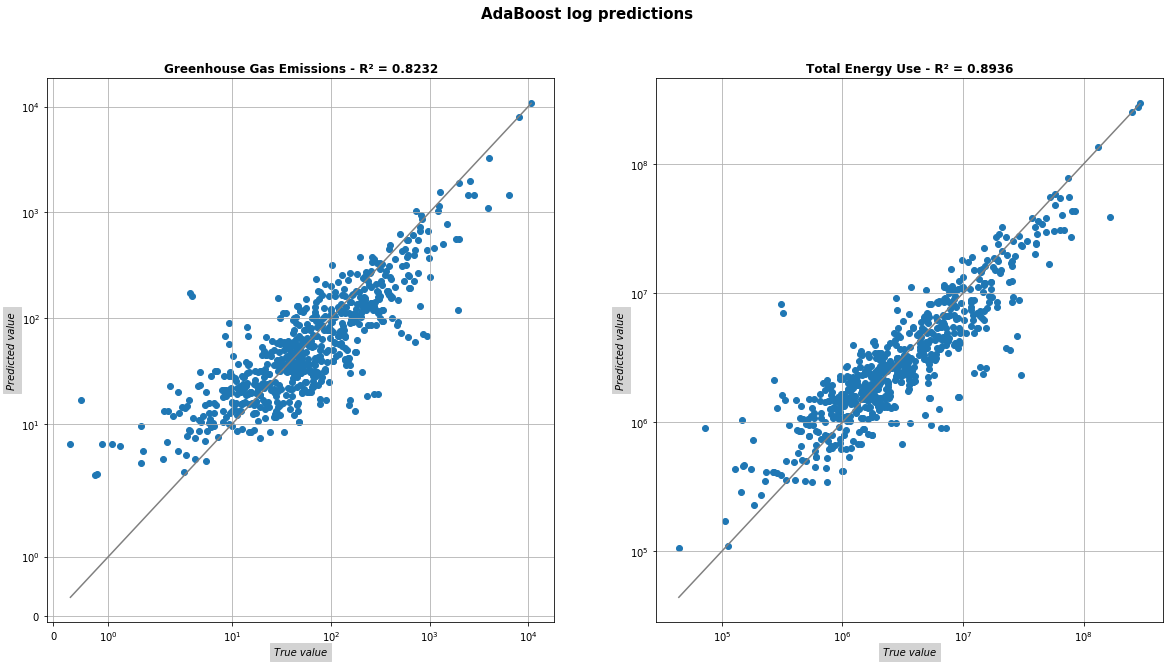

In [183]:
df_results = store_results(np.array([y_ada_log_ghg, y_ada_log_eng]).T, 'ada_log', df_results)
plot_results(df_results, 'ada_log', 'AdaBoost log predictions', p_score = 'R²')

### Cross Validation

In [ ]:
# Grid Search
grid_light = GridSearchCV(
    estimator = AdaBoostRegressor(
        n_iter_no_change = 50
    ),
    param_grid = {
        'learning_rate' : np.logspace(-5, -1, 5),
        'max_depth' : [3, 5, 8],
        'l2_regularization' : np.logspace(-5,5,11)
    },
    cv = 5,
    scoring = 'r2'
)

# Combining predictions

In [162]:
df_results.to_pickle('prediction_results.pkl')

In [163]:
df_results = pd.read_pickle('prediction_results.pkl')
df_results.head()

,test_GHG,test_Energy,dummy_GHG,dummy_Energy,forest_GHG,forest_Energy,forest_log_GHG,forest_log_Energy,forest_cv_GHG,forest_cv_Energy,forest_cv_log_GHG,forest_cv_log_Energy,mlp_GHG,mlp_Energy,mlp_log_GHG,mlp_log_Energy,mlp_cv_GHG,mlp_cv_Energy,mlp_cv_log_GHG,mlp_cv_log_Energy,SVR_GHG,SVR_Energy,SVR_log_GHG,SVR_log_Energy,SVR_cv_GHG,SVR_cv_Energy,SVR_cv_log_GHG,SVR_cv_log_Energy,GBR_GHG,GBR_Energy,GBR_log_GHG,GBR_log_Energy,lightGBM_GHG,lightGBM_Energy,lightGBM_log_GHG,lightGBM_log_Energy,light_cv_log_GHG,light_cv_log_Energy,light_cv_GHG,light_cv_Energy,ada_GHG,ada_Energy,ada_log_GHG,ada_log_Energy,GBR_cv_GHG,GBR_cv_Energy,GBR_cv_log_GHG,GBR_cv_log_Energy
3218,57.59,1933811.625,172.379107,8.075461e+06,200.8649,3.544635e+06,52.788100,3.071967e+06,134.3278,3.969744e+06,68.316844,3.521539e+06,129.548582,1.242791e+03,127.820099,5.422886e+06,209.127882,1.320332e+06,109.259899,3.554868e+06,66.589508,2.565152e+06,48.751633,2.712811e+06,99.012909,3.290243e+06,82.402906,2.572712e+06,361.73,5587347.000,44.059990,2.439483e+06,59.061637,8.374044e+05,54.983081,1.941161e+06,51.972295,1.940007e+06,20.333215,1.142535e+06,113.687030,8.041850e+06,88.923532,3.176693e+06,361.729112,1633399.375,44.38,2.439484e+06
1315,32.76,729535.000,172.379107,8.075461e+06,19.9991,6.333299e+05,21.023123,6.439073e+05,22.2358,7.219511e+05,18.874745,7.093736e+05,40.585826,1.242791e+03,23.691436,6.401719e+05,3.029088,7.702997e+05,13.660298,6.673887e+05,43.107410,2.565127e+06,37.830447,1.658948e+06,9.527583,1.801979e+06,16.606819,6.207519e+05,23.52,561473.875,23.520000,5.614742e+05,23.990742,5.848872e+05,23.520553,5.627228e+05,23.506510,5.639296e+05,24.739397,5.763097e+05,115.584983,7.983641e+06,15.665455,7.604184e+05,23.519911,561473.875,23.52,5.614739e+05
2796,95.93,3626431.500,172.379107,8.075461e+06,91.3689,3.365583e+06,72.568859,3.229135e+06,73.9995,3.617972e+06,62.761266,3.266287e+06,132.174537,3.076353e+06,104.633597,5.082852e+06,96.114059,3.488771e+06,57.996373,2.830953e+06,76.941549,2.565173e+06,86.477313,4.165204e+06,95.478519,4.346061e+06,89.079100,4.332140e+06,95.69,3921557.000,95.690015,3.921559e+06,95.444776,3.927925e+06,95.479702,3.917598e+06,95.521239,3.936131e+06,93.715652,3.931514e+06,143.480079,7.420109e+06,82.701592,3.785283e+06,95.689986,3921557.000,95.69,3.921557e+06
1711,152.14,5155568.500,172.379107,8.075461e+06,92.7743,5.515235e+06,85.621569,4.774229e+06,100.1146,5.326922e+06,82.847866,5.066294e+06,205.704356,1.098435e+07,87.183144,3.320926e+06,104.283542,5.085762e+06,72.224410,4.116498e+06,52.477939,2.565153e+06,50.796545,3.290024e+06,127.219369,4.042923e+06,70.326377,4.204882e+06,67.45,5135040.000,102.080060,1.592817e+06,26.648623,4.947801e+06,81.204297,5.171843e+06,84.780111,4.364868e+06,-9.766907,2.990162e+06,163.861741,8.288377e+06,112.949866,5.887130e+06,25.282836,5135040.000,90.01,1.592817e+06
1654,38.53,1539478.500,172.379107,8.075461e+06,49.9846,2.114532e+06,41.546698,1.590858e+06,51.5521,1.998796e+06,45.096731,1.809946e+06,66.248365,1.242791e+03,61.972506,1.538774e+06,33.104261,1.996426e+06,48.284448,1.419310e+06,56.933980,2.565136e+06,48.943948,1.915278e+06,56.024628,2.475337e+06,66.065933,1.900431e+06,35.17,1454222.000,35.169999,1.454226e+06,31.767552,1.206717e+06,35.126408,1.627258e+06,34.361233,1.414683e+06,25.147497,1.219497e+06,132.381905,8.013033e+06,50.424493,2.473262e+06,35.164498,1454222.000,35.17,1.454222e+06


## Combining all predictions

In [45]:
from PElec_01_scripts import score_predictions, plot_results, store_results

In [164]:
# Choosing columns to combine
combine_ghg = [x for x in df_results.columns if 'GHG' in x]
combine_eng = [x for x in df_results.columns if 'Energy' in x]

In [165]:
# Combining
df_results['all_GHG'] = df_results[combine_ghg].iloc[:,2:].mean(axis = 1)
df_results['all_Energy'] = df_results[combine_eng].iloc[:,2:].mean(axis = 1)
score_predictions(y_test, df_results[['all_GHG', 'all_Energy']])

,GHG emissions,Energy use
MSLE,0.6629,0.4586
R²,0.5945,-2.0308


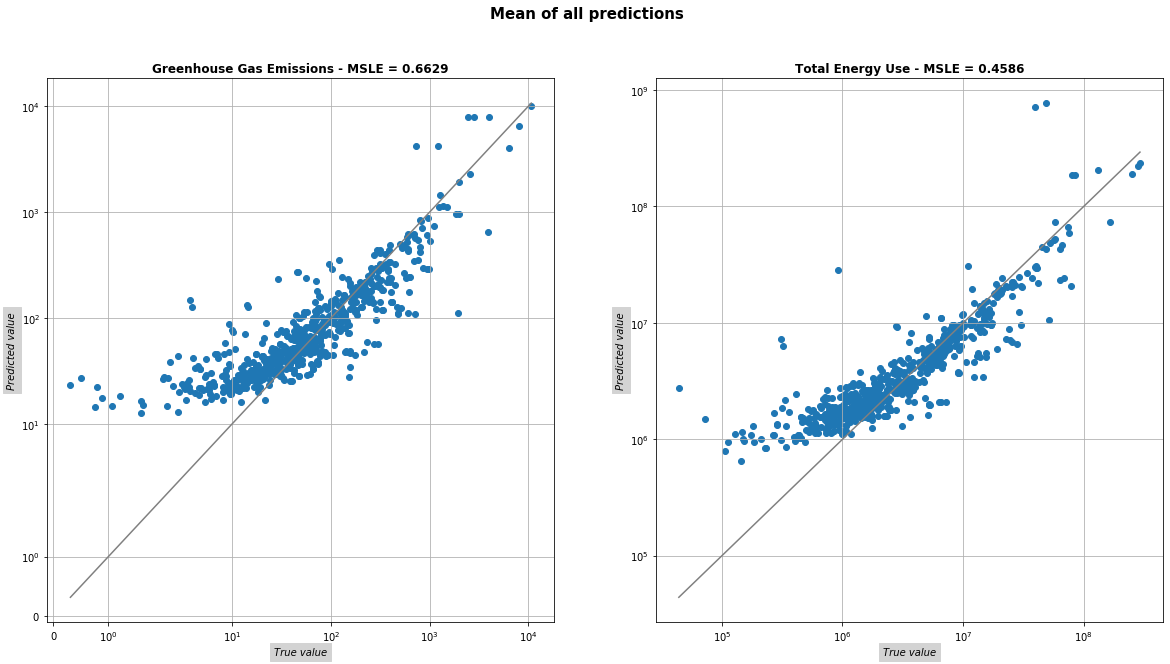

In [166]:
# Plotting results
plot_results(df_results, 'all', 'Mean of all predictions', p_score = 'MSLE')

In [167]:
df_results[df_results['all_Energy'] > 10**9][combine_eng]

,test_Energy,dummy_Energy,forest_Energy,forest_log_Energy,forest_cv_Energy,forest_cv_log_Energy,mlp_Energy,mlp_log_Energy,mlp_cv_Energy,mlp_cv_log_Energy,SVR_Energy,SVR_log_Energy,SVR_cv_Energy,SVR_cv_log_Energy,GBR_Energy,GBR_log_Energy,lightGBM_Energy,lightGBM_log_Energy,light_cv_log_Energy,light_cv_Energy,ada_Energy,ada_log_Energy,GBR_cv_Energy,GBR_cv_log_Energy


## Best predictions

      GHG emissions  Energy use
MSLE         0.6214      0.3966
R²           0.8997      0.9107


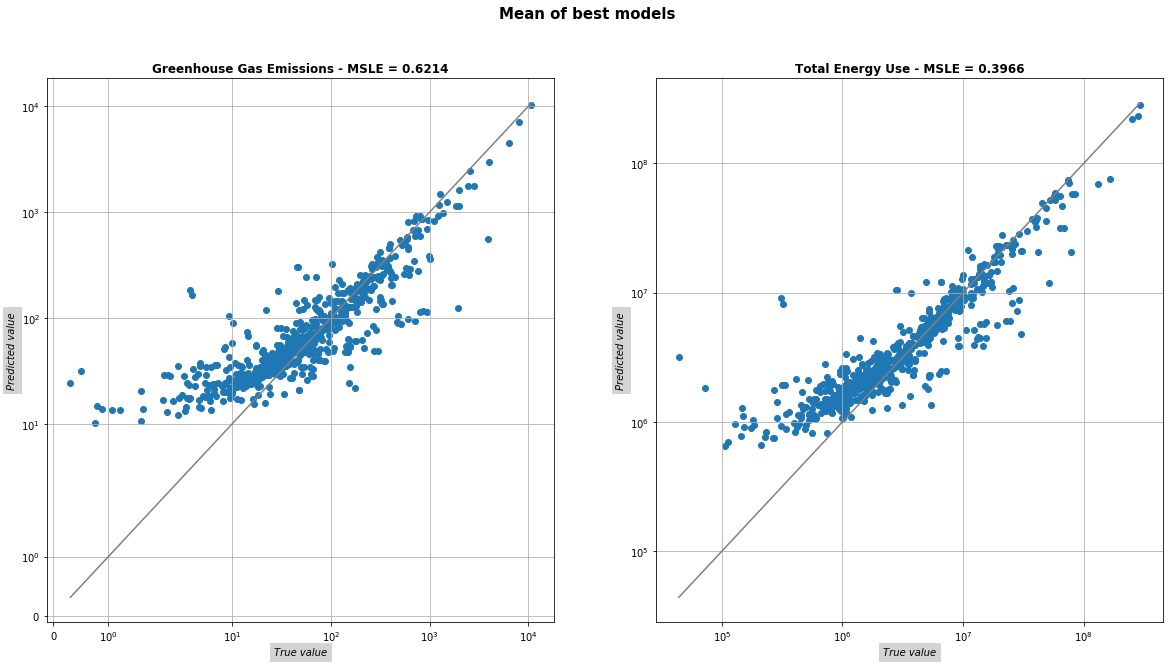

In [168]:
# predictions to combine
list_pred = ['forest', 'forest_log', 'forest_cv', 'forest_cv_log', 
             'GBR', 'GBR_log', 'GBR_cv', 'GBR_cv_log', 
             'lightGBM_log', 'light_cv_log',
             'ada', 'ada_log']

combine_best_ghg = [ x + '_GHG' for x in list_pred]
combine_best_eng = [ x + '_Energy' for x in list_pred]

df_results['best_GHG'] = df_results[combine_best_ghg].mean(axis = 1)
df_results['best_Energy'] = df_results[combine_best_eng].mean(axis = 1)

print(score_predictions(y_test, df_results[['best_GHG', 'best_Energy']]))
plot_results(df_results, 'best', 'Mean of best models', p_score = 'MSLE')

## Combinaison of log models

      GHG emissions  Energy use
MSLE         0.4715      0.3099
R²           0.8406      0.8782


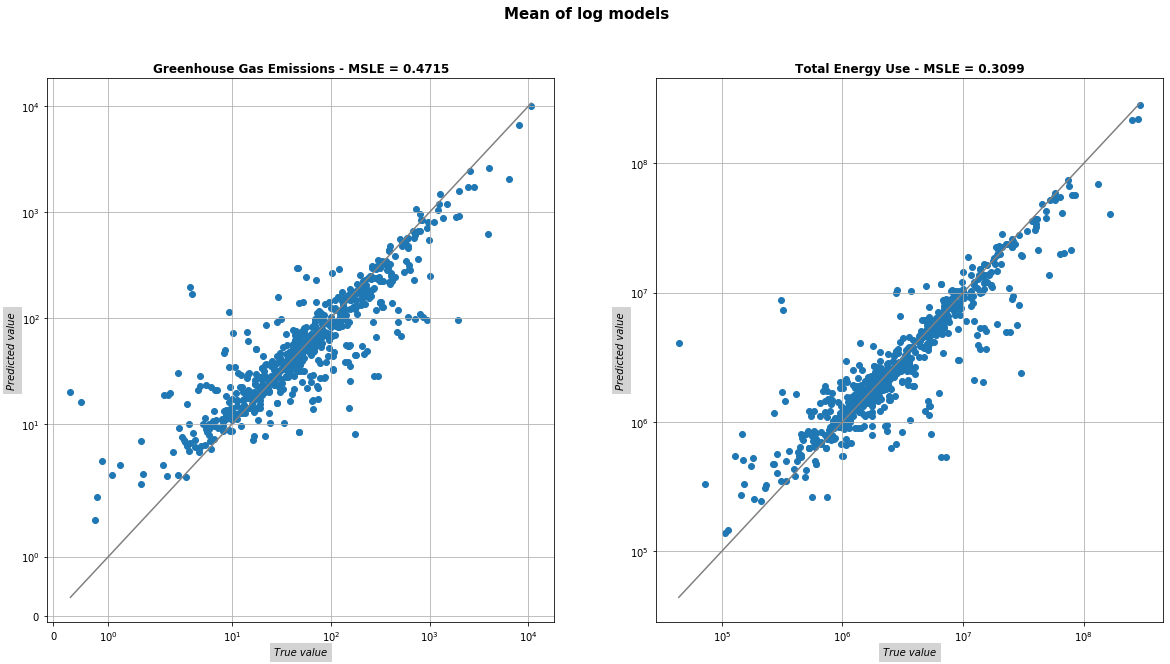

In [169]:
combine_log_ghg =  [x for x in combine_best_ghg if 'log' in x]
combine_log_eng =  [x for x in combine_best_eng if 'log' in x]

df_results['log_GHG'] = df_results[combine_log_ghg].mean(axis = 1)
df_results['log_Energy'] = df_results[combine_log_eng].mean(axis = 1)

print(score_predictions(y_test, df_results[['log_GHG', 'log_Energy']]))
plot_results(df_results, 'log', 'Mean of log models', p_score = 'MSLE')

## Combinaison of cv log models

      GHG emissions  Energy use
MSLE         0.4804      0.3154
R²           0.8467      0.8763


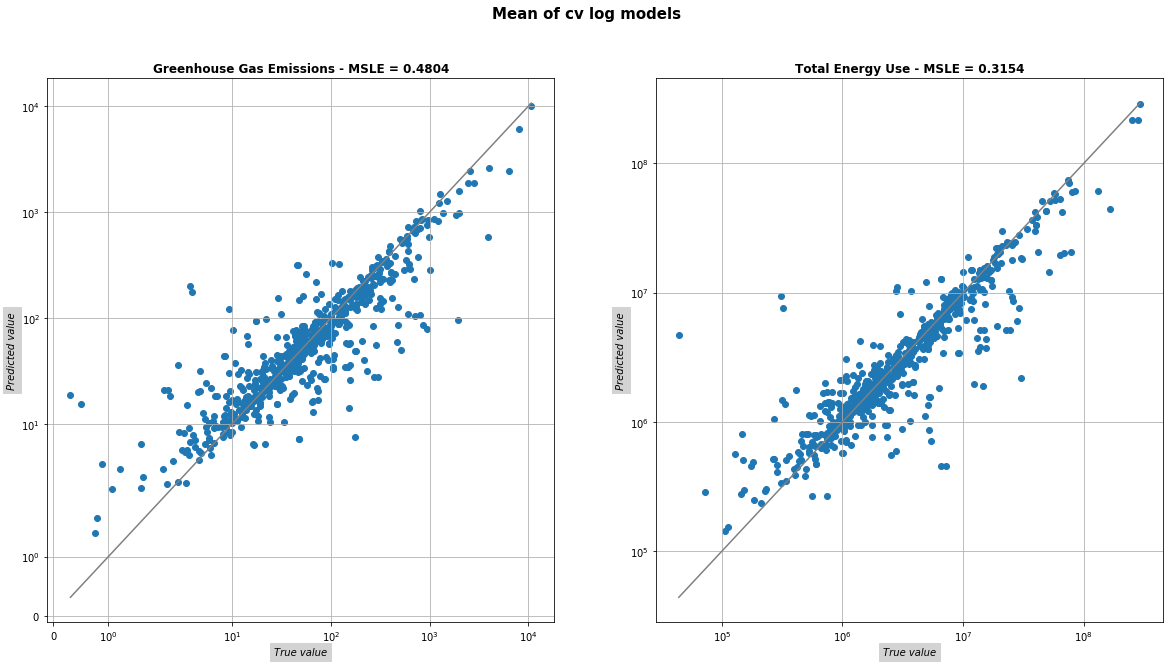

In [170]:
combine_cv_log_ghg =  [x for x in combine_log_ghg if 'cv' in x]
combine_cv_log_eng =  [x for x in combine_log_eng if 'cv' in x]

df_results['log_cv_GHG'] = df_results[combine_cv_log_ghg].mean(axis = 1)
df_results['log_cv_Energy'] = df_results[combine_cv_log_eng].mean(axis = 1)

print(score_predictions(y_test, df_results[['log_cv_GHG', 'log_cv_Energy']]))
plot_results(df_results, 'log_cv', 'Mean of cv log models', p_score = 'MSLE')

# Choosing best models

In [171]:
# Table with MSLE scores
df_scores = pd.DataFrame(columns = ['GHG emissions', 'Energy use'])
models = [x[:-4] for x in df_results.columns if 'GHG' in x][2:]

for model in models:
    df_scores.loc[model] = score_predictions(y_test, df_results[[model + '_GHG', model + '_Energy']]).loc['MSLE']
    

In [172]:
dict_colors = {'forest' : 'g', 'mlp' : 'r', 'SVR':'brown', 'GBR' : 'b', 'light' : 'y', 'lightGBM' : 'y', 'ada':'purple', 
               'all' : 'grey', 'best' : 'grey', 'log' : 'grey', 'log_cv' : 'grey'}

dict_markers = {'_log' : 'v', '_cv' : '*', '_cv_log': 'D'}

In [173]:
df_scores['color'] = df_scores.index
df_scores['color'] = df_scores['color'].apply(lambda x: dict_colors[x[:x.index('_')]] if '_' in x else dict_colors[x])

df_scores['marker'] = df_scores.index
df_scores['marker'] = df_scores['marker'].apply(lambda x : dict_markers[x[x.index('_'):]] if '_' in x else 'o')

df_scores.loc['best','marker'] = 'D'
df_scores.loc['log','marker'] = 'v'

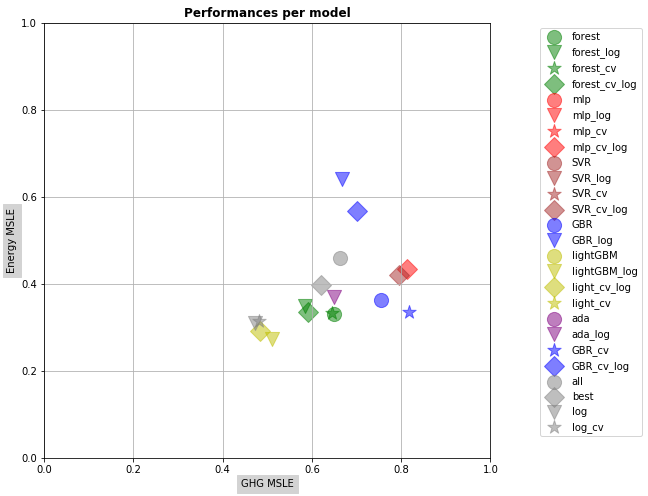

In [174]:
plt.figure(figsize = (8,8))

for model in df_scores.index:
    
    plt.scatter(
        df_scores.loc[model, 'GHG emissions'],
        df_scores.loc[model, 'Energy use'],
        label = model,
        sizes = [200],
        marker = df_scores.loc[model, 'marker'],
        color = df_scores.loc[model, 'color'],
        alpha = 0.5
    )

plt.xlabel('GHG MSLE', backgroundcolor = 'lightgrey')
plt.ylabel('Energy MSLE', backgroundcolor = 'lightgrey')

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.legend(bbox_to_anchor = (0.85,1,0.5,0))

plt.title('Performances per model', fontweight = 'bold')
plt.show()

In [177]:
# Best GHG predictions
df_scores.sort_values(by = 'GHG emissions', ascending = True).head()

,GHG emissions,Energy use,color,marker
log,0.4715,0.3099,grey,v
log_cv,0.4804,0.3154,grey,*
light_cv_log,0.4836,0.2927,y,D
lightGBM_log,0.5107,0.2730,y,v
forest_log,0.5841,0.3499,g,v


In [178]:
# Best Energy predictions
df_scores.sort_values(by = 'Energy use', ascending = True).head()

,GHG emissions,Energy use,color,marker
lightGBM_log,0.5107,0.2730,y,v
light_cv_log,0.4836,0.2927,y,D
log,0.4715,0.3099,grey,v
log_cv,0.4804,0.3154,grey,*
forest,0.6496,0.3306,g,o


In [179]:
# Best global performance
df_scores_clean = df_scores.dropna().copy()
df_scores_clean['distance'] = (df_scores_clean['GHG emissions']**2 + df_scores_clean['Energy use']**2)**0.5
df_scores_clean.sort_values(by = 'distance', ascending = True).head()

,GHG emissions,Energy use,color,marker,distance
log,0.4715,0.3099,grey,v,0.564225
light_cv_log,0.4836,0.2927,y,D,0.565281
log_cv,0.4804,0.3154,grey,*,0.574684
lightGBM_log,0.5107,0.2730,y,v,0.579088
forest_cv_log,0.5905,0.3349,g,D,0.678858
